#  Отчет по проектному месяцу

- Фамилия и имя: Куклина Татьяна
- Когорта: ds_rs_52
- Название проекта: M1
- Наставник: Фёдор Коноваленко @fdkonovalenko
- Ссылка на репозиторий: [https://github.com/tatikuklina/M1] https://github.com/tatikuklina/M1 
- Краткое описание задач: 
    1. Модель для предсказания риска сердечного приступа, используя данные пациентов, такие как возраст, привычки, состояние здоровья и результаты анализа крови, 
    2. Приложение на FastAPI для получения предсказаний по пользовательскому запросу.


#  Описание проекта

**Проект размещен на GitHub**
 
С репозиторием проекта можно ознакомиться по ссылке: [https://github.com/tatikuklina/M1] https://github.com/tatikuklina/M1

**Заголовок**

 - Проект: M1
 
**Описание проекта**

- Заказчик: наставник Фёдор Коноваленко
- Цель анализа: разработать модель машинного обучения, а также подготовить библиотеку и интерфейс к ней для предсказания на тестовой выборке. 
- Образ результата:
    1. Модель для предсказания риска сердечного приступа, используя данные пациентов, такие как возраст, привычки, состояние здоровья и результаты анализа крови, 
    2. Приложение на FastAPI для получения предсказаний по пользовательскому запросу.

- Входные данные:
    - heart_test.csv - данные пациентов для предсказания риска сердечных приступов для test 
    - heart_train.csv - данные пациентов для предсказания риска сердечных приступов для train
    - test.py - скрипт, которым будет тестироваться качество модели
        
**Ход исследования**
    
- Шаг 1. Исследование датасета
- Шаг 2. Предобработка данных
- Шаг 3. Статистический анализ данных
- Шаг 4. Обучение модели
- Шаг 5. Подготовка предсказания на тестовой выборке
- Шаг 6. Подготовка скриптов и библиотеки для обработки данных и предсказания на тестовой выборке
- Шаг 7. Написание инструмента для тестирования
- Шаг 8. Оформление документации
- Шаг 9. Общий вывод

**Стек**
- Python (ООП)
- Pandas
- numpy
- Scikitlearn
- CatBoost
- FastAPI
- HTML

**Рекомендация для заказчика**

- TO BE UPDATED Заказчику внеобходимо начать контролировать маркеры/флаги, которые свидетельсвуют о снижении актвиности такие как: 
    - менее 11 минут  проведённого на сайте ( в т.ч. в категории мелкая бытовая техника и товары для детей),
    - среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев > 0.2
    - среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев менее 4
- TO BE UPDATED Заказчику необходимо начать делать индивидуальные спец акции, когда маркеры свидетельсвуют о снижении актавности

## Шаг 1. Исследование датасета

### Шаг 1.1 Загрузка данных

In [1]:
#импорт базовых библиотек
import pandas as pd
import numpy as np

!pip install seaborn 
import seaborn as sns # для графика seaborn

import matplotlib.pyplot as plt # для графиков

#!pip install phik
import phik
from phik.report import plot_correlation_matrix # для графика корреляции


from sklearn.model_selection import train_test_split # для разделения данных
from sklearn.model_selection import cross_val_score # для кросс-валидации

# класс pipeline и SMOTE (дисбалансы)
from imblearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# классы для подготовки данных
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
#from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.calibration import CalibratedClassifierCV

# класс для работы с пропусками
from sklearn.impute import SimpleImputer

# функция для работы с метриками
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.metrics import roc_auc_score , recall_score , precision_score ,  f1_score , accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

#StratifiedKFold и RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

#optuna
import optuna
from optuna.samplers import TPESampler

# модели
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

#SHAP
#!pip install shap
import shap
from sklearn.inspection import permutation_importance



#!pip install -U scikit-learn 

C:\Users\aeroflot\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#открытие данных
heart_test = pd.read_csv('C:/Users/aeroflot/home/prc_month/heart_test.csv', sep=',') 
heart_train = pd.read_csv('C:/Users/aeroflot/home/prc_month/heart_train.csv', sep=',') 

In [3]:
#размер таблиц
         
print(f'Размер таблицы heart_test: { heart_test.shape}')   
print(f'Размер таблицы heart_train: { heart_train.shape}')  


Размер таблицы heart_test: (966, 27)
Размер таблицы heart_train: (8685, 28)


In [4]:
# вывод пяти случайных строк
heart_test.sample(5) 

,Unnamed: 0,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Blood sugar,CK-MB,Troponin,Gender,Systolic blood pressure,Diastolic blood pressure,id
351,351,0.640449,0.450000,0.025665,1.0,1.0,1.0,1.0,1.0,0.707195,...,0.710390,3.0,0.833333,0.227018,0.048229,0.036512,Male,0.406452,0.558140,6726
605,605,0.337079,0.021429,0.032081,1.0,1.0,1.0,1.0,0.0,0.078419,...,0.181818,1.0,0.166667,0.227018,0.048229,0.036512,Male,0.374194,0.383721,3963
47,47,0.089888,0.550000,0.079743,1.0,0.0,0.0,0.0,1.0,0.974706,...,0.045455,0.0,0.000000,0.227018,0.048229,0.036512,Female,0.580645,0.372093,6630
864,864,0.168539,0.542857,0.024748,1.0,1.0,1.0,1.0,1.0,0.228873,...,0.651948,6.0,0.000000,0.227018,0.048229,0.036512,Male,0.554839,0.534884,7835
935,935,0.808989,0.246429,0.057745,1.0,0.0,1.0,1.0,0.0,0.418287,...,0.612987,1.0,0.833333,0.227018,0.048229,0.036512,Male,0.619355,0.616279,7093


In [5]:
# вывод пяти случайных строк
heart_train.sample(5) 

,Unnamed: 0,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk (Binary),Blood sugar,CK-MB,Troponin,Gender,Systolic blood pressure,Diastolic blood pressure,id
1046,1046,0.235955,0.932143,0.044913,1.0,0.0,0.0,0.0,0.0,0.233129,...,0.0,0.500000,1.0,0.227018,0.048229,0.036512,Female,0.445161,0.604651,5324
3076,3076,0.269663,0.114286,0.056829,1.0,1.0,1.0,1.0,1.0,0.742660,...,1.0,0.833333,1.0,0.164032,0.004501,0.000291,Male,0.212903,0.313953,4387
6124,6124,0.348315,0.725000,0.034830,0.0,1.0,1.0,0.0,0.0,0.645305,...,2.0,0.166667,1.0,0.122530,0.008472,0.000194,Male,0.335484,0.569767,8757
1520,1520,0.483146,0.796429,0.079743,1.0,0.0,1.0,1.0,1.0,0.703794,...,5.0,0.000000,0.0,0.227018,0.048229,0.036512,Male,0.619355,0.453488,5426
925,925,0.303371,0.142857,0.076994,1.0,0.0,1.0,1.0,1.0,0.308336,...,1.0,1.000000,0.0,0.227018,0.048229,0.036512,Female,0.554839,0.488372,1915


In [6]:
#размер таблиц
         
print(f'Размер таблицы heart_test: {heart_test.shape}')  
print(f'Размер таблицы heart_train: {heart_train.shape}')  

Размер таблицы heart_test: (966, 27)
Размер таблицы heart_train: (8685, 28)


In [7]:
#наименование колонок
heart_test.columns

Index(['Unnamed: 0', 'Age', 'Cholesterol', 'Heart rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
       'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems',
       'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income',
       'BMI', 'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Blood sugar', 'CK-MB', 'Troponin', 'Gender',
       'Systolic blood pressure', 'Diastolic blood pressure', 'id'],
      dtype='object')

In [8]:
#наименование колонок
heart_train.columns

Index(['Unnamed: 0', 'Age', 'Cholesterol', 'Heart rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
       'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems',
       'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income',
       'BMI', 'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Heart Attack Risk (Binary)', 'Blood sugar',
       'CK-MB', 'Troponin', 'Gender', 'Systolic blood pressure',
       'Diastolic blood pressure', 'id'],
      dtype='object')

In [9]:
# проверка идентичны ли колонки
columns_equal = heart_test.columns.equals(heart_train.columns)
print(f"Колонки идентичны: {columns_equal}")

Колонки идентичны: False


In [10]:
# поиск неидентичных колонок
def compare_columns(df1, df2, df1_name='df1', df2_name='df2'):
    cols1 = set(df1.columns)
    cols2 = set(df2.columns)
    
    print("=== СРАВНЕНИЕ КОЛОНОК ===")
    print(f"Колонки в {df1_name}: {len(cols1)}")
    print(f"Колонки в {df2_name}: {len(cols2)}")
    print()
    
    # Общие колонки
    common_cols = cols1 & cols2
    print(f"Общие колонки ({len(common_cols)}): {sorted(common_cols)}")
    print()
    
    # Уникальные для первого датафрейма
    unique_to_df1 = cols1 - cols2
    if unique_to_df1:
        print(f"Колонки только в {df1_name} ({len(unique_to_df1)}): {sorted(unique_to_df1)}")
    else:
        print(f"Уникальных колонок в {df1_name}: нет")
    print()
    
    # Уникальные для второго датафрейма
    unique_to_df2 = cols2 - cols1
    if unique_to_df2:
        print(f"Колонки только в {df2_name} ({len(unique_to_df2)}): {sorted(unique_to_df2)}")
    else:
        print(f"Уникальных колонок в {df2_name}: нет")
    print()
    
    # Проверка порядка
    order_same = list(df1.columns) == list(df2.columns)
    print(f"Порядок колонок одинаков: {order_same}")
    
    return common_cols, unique_to_df1, unique_to_df2

# Использование
common, unique1, unique2 = compare_columns(heart_test, heart_train, 'test', 'train')

=== СРАВНЕНИЕ КОЛОНОК ===
Колонки в test: 27
Колонки в train: 28

Общие колонки (27): ['Age', 'Alcohol Consumption', 'BMI', 'Blood sugar', 'CK-MB', 'Cholesterol', 'Diabetes', 'Diastolic blood pressure', 'Diet', 'Exercise Hours Per Week', 'Family History', 'Gender', 'Heart rate', 'Income', 'Medication Use', 'Obesity', 'Physical Activity Days Per Week', 'Previous Heart Problems', 'Sedentary Hours Per Day', 'Sleep Hours Per Day', 'Smoking', 'Stress Level', 'Systolic blood pressure', 'Triglycerides', 'Troponin', 'Unnamed: 0', 'id']

Уникальных колонок в test: нет

Колонки только в train (1): ['Heart Attack Risk (Binary)']

Порядок колонок одинаков: False


In [11]:
# изменение названий столбцов 
heart_train = heart_train.rename(columns= {'Unnamed: 0' : 'unnamed_0'
                                            , 'Age' : 'age'
                                            , 'Cholesterol' : 'cholesterol'
                                            , 'Heart rate' : 'heart_rate'
                                            , 'Diabetes' : 'diabetes'
                                            , 'Family History' : 'family_history'
                                            , 'Smoking' : 'smoking'
                                            , 'Obesity' : 'obesity'
                                            , 'Alcohol Consumption' : 'alcohol_consumption'
                                            , 'Exercise Hours Per Week' : 'exercise_hours_per_week'
                                            , 'Diet' : 'diet'
                                            , 'Previous Heart Problems' : 'previous_heart_problems'
                                            , 'Medication Use' : 'medication_use'
                                            , 'Stress Level' : 'stress_level'
                                            , 'Sedentary Hours Per Day' : 'sedentary_hours_per_day'
                                            , 'Income' : 'income'
                                            , 'BMI' : 'bmi'
                                            , 'Triglycerides' : 'triglycerides'
                                            , 'Physical Activity Days Per Week' : 'physical_activity_days_per_week'
                                            , 'Sleep Hours Per Day' : 'sleep_hours_per_day'
                                            , 'Heart Attack Risk (Binary)' : 'heart_attack_risk_binary'
                                            , 'Blood sugar' : 'blood_sugar'
                                            , 'CK-MB' : 'ck_mb'
                                            , 'Troponin' : 'troponin'
                                            , 'Gender' : 'gender'
                                            , 'Systolic blood pressure': 'systolic_blood_pressure'
                                            , 'Diastolic blood pressure' : 'diastolic_blood_pressure'
                                            , 'id' : 'id'
                                        })

In [12]:
# изменение названий столбцов 
heart_test= heart_test.rename(columns= {'Unnamed: 0' : 'unnamed_0'
                                            , 'Age' : 'age'
                                            , 'Cholesterol' : 'cholesterol'
                                            , 'Heart rate' : 'heart_rate'
                                            , 'Diabetes' : 'diabetes'
                                            , 'Family History' : 'family_history'
                                            , 'Smoking' : 'smoking'
                                            , 'Obesity' : 'obesity'
                                            , 'Alcohol Consumption' : 'alcohol_consumption'
                                            , 'Exercise Hours Per Week' : 'exercise_hours_per_week'
                                            , 'Diet' : 'diet'
                                            , 'Previous Heart Problems' : 'previous_heart_problems'
                                            , 'Medication Use' : 'medication_use'
                                            , 'Stress Level' : 'stress_level'
                                            , 'Sedentary Hours Per Day' : 'sedentary_hours_per_day'
                                            , 'Income' : 'income'
                                            , 'BMI' : 'bmi'
                                            , 'Triglycerides' : 'triglycerides'
                                            , 'Physical Activity Days Per Week' : 'physical_activity_days_per_week'
                                            , 'Sleep Hours Per Day' : 'sleep_hours_per_day'
                                            #, 'Heart Attack Risk (Binary)' : 'heart_attack_risk_binary'
                                            , 'Blood sugar' : 'blood_sugar'
                                            , 'CK-MB' : 'ck_mb'
                                            , 'Troponin' : 'troponin'
                                            , 'Gender' : 'gender'
                                            , 'Systolic blood pressure': 'systolic_blood_pressure'
                                            , 'Diastolic blood pressure' : 'diastolic_blood_pressure'
                                            , 'id' : 'id'
                                        })

In [13]:
#наименование колонок
heart_test.columns

Index(['unnamed_0', 'age', 'cholesterol', 'heart_rate', 'diabetes',
       'family_history', 'smoking', 'obesity', 'alcohol_consumption',
       'exercise_hours_per_week', 'diet', 'previous_heart_problems',
       'medication_use', 'stress_level', 'sedentary_hours_per_day', 'income',
       'bmi', 'triglycerides', 'physical_activity_days_per_week',
       'sleep_hours_per_day', 'blood_sugar', 'ck_mb', 'troponin', 'gender',
       'systolic_blood_pressure', 'diastolic_blood_pressure', 'id'],
      dtype='object')

In [14]:
#наименование колонок
heart_train.columns

Index(['unnamed_0', 'age', 'cholesterol', 'heart_rate', 'diabetes',
       'family_history', 'smoking', 'obesity', 'alcohol_consumption',
       'exercise_hours_per_week', 'diet', 'previous_heart_problems',
       'medication_use', 'stress_level', 'sedentary_hours_per_day', 'income',
       'bmi', 'triglycerides', 'physical_activity_days_per_week',
       'sleep_hours_per_day', 'heart_attack_risk_binary', 'blood_sugar',
       'ck_mb', 'troponin', 'gender', 'systolic_blood_pressure',
       'diastolic_blood_pressure', 'id'],
      dtype='object')

**Выводы**
 
- 2 таблицы heart_test, heart_train были пролиты
- изменение названий столбцов произведено во всех таблицах на змеинный регистр и прописные буквы

### Шаг 1.2 Исследование датасета

In [15]:
#основная информация о датафрейме
heart_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   unnamed_0                        966 non-null    int64  
 1   age                              966 non-null    float64
 2   cholesterol                      966 non-null    float64
 3   heart_rate                       966 non-null    float64
 4   diabetes                         935 non-null    float64
 5   family_history                   935 non-null    float64
 6   smoking                          935 non-null    float64
 7   obesity                          935 non-null    float64
 8   alcohol_consumption              935 non-null    float64
 9   exercise_hours_per_week          966 non-null    float64
 10  diet                             966 non-null    int64  
 11  previous_heart_problems          935 non-null    float64
 12  medication_use        

In [16]:
#основная информация о датафрейме
heart_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8685 entries, 0 to 8684
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   unnamed_0                        8685 non-null   int64  
 1   age                              8685 non-null   float64
 2   cholesterol                      8685 non-null   float64
 3   heart_rate                       8685 non-null   float64
 4   diabetes                         8442 non-null   float64
 5   family_history                   8442 non-null   float64
 6   smoking                          8442 non-null   float64
 7   obesity                          8442 non-null   float64
 8   alcohol_consumption              8442 non-null   float64
 9   exercise_hours_per_week          8685 non-null   float64
 10  diet                             8685 non-null   int64  
 11  previous_heart_problems          8442 non-null   float64
 12  medication_use      

In [17]:
#уникальные значения
print(f"\nКоличество уникальных значений в поле 'unnamed_0' таблицы heart_test: {len(heart_test['unnamed_0'].unique())}")
print(f"\nКоличество уникальных значений в поле 'age' таблицы heart_test: {len(heart_test['age'].unique())}")
print(f"\nКоличество уникальных значений в поле 'cholesterol' таблицы heart_test: {len(heart_test['cholesterol'].unique())}")
print(f"\nКоличество уникальных значений в поле 'heart_rate' таблицы heart_test: {len(heart_test['heart_rate'].unique())}")
print(f"\nКоличество уникальных значений в поле 'diabetes' таблицы heart_test: {len(heart_test['diabetes'].unique())}")
print(f"\nКоличество уникальных значений в поле 'family_history' таблицы heart_test: {len(heart_test['family_history'].unique())}")
print(f"\nКоличество уникальных значений в поле 'smoking' таблицы heart_test: {len(heart_test['smoking'].unique())}")
print(f"\nКоличество уникальных значений в поле 'obesity' таблицы heart_test: {len(heart_test['obesity'].unique())}")
print(f"\nКоличество уникальных значений в поле 'alcohol_consumption' таблицы heart_test: {len(heart_test['alcohol_consumption'].unique())}")
print(f"\nКоличество уникальных значений в поле 'exercise_hours_per_week' таблицы heart_test: {len(heart_test['exercise_hours_per_week'].unique())}")
print(f"\nКоличество уникальных значений в поле 'diet' таблицы heart_test: {len(heart_test['diet'].unique())}")
print(f"\nКоличество уникальных значений в поле 'previous_heart_problems' таблицы heart_test: {len(heart_test['previous_heart_problems'].unique())}")
print(f"\nКоличество уникальных значений в поле 'medication_use' таблицы heart_test: {len(heart_test['medication_use'].unique())}")
print(f"\nКоличество уникальных значений в поле 'stress_level' таблицы heart_test: {len(heart_test['stress_level'].unique())}")
print(f"\nКоличество уникальных значений в поле 'sedentary_hours_per_day' таблицы heart_test: {len(heart_test['sedentary_hours_per_day'].unique())}")
print(f"\nКоличество уникальных значений в поле 'income' таблицы heart_test: {len(heart_test['income'].unique())}")
print(f"\nКоличество уникальных значений в поле 'bmi' таблицы heart_test: {len(heart_test['bmi'].unique())}")
print(f"\nКоличество уникальных значений в поле 'triglycerides' таблицы heart_test: {len(heart_test['triglycerides'].unique())}")
print(f"\nКоличество уникальных значений в поле 'physical_activity_days_per_week' таблицы heart_test: {len(heart_test['physical_activity_days_per_week'].unique())}")
print(f"\nКоличество уникальных значений в поле 'sleep_hours_per_day' таблицы heart_test: {len(heart_test['sleep_hours_per_day'].unique())}")
#print(f"\nКоличество уникальных значений в поле 'heart_attack_risk_binary' таблицы heart_test: {len(heart_test['heart_attack_risk_binary'].unique())}")
print(f"\nКоличество уникальных значений в поле 'blood_sugar', таблицы heart_test: {len(heart_test['blood_sugar'].unique())}")
print(f"\nКоличество уникальных значений в поле 'ck_mb' таблицы heart_test: {len(heart_test['ck_mb'].unique())}")
print(f"\nКоличество уникальных значений в поле 'troponin' таблицы heart_test: {len(heart_test['troponin'].unique())}")
print(f"\nКоличество уникальных значений в поле 'gender' таблицы heart_test: {len(heart_test['gender'].unique())}")
print(f"\nКоличество уникальных значений в поле 'systolic_blood_pressure' таблицы heart_test: {len(heart_test['systolic_blood_pressure'].unique())}")
print(f"\nКоличество уникальных значений в поле 'diastolic_blood_pressure' таблицы heart_test: {len(heart_test['diastolic_blood_pressure'].unique())}")
print(f"\nКоличество уникальных значений в поле 'id' таблицы heart_test: {len(heart_test['id'].unique())}")
print('-----------')
print(f"\nКоличество уникальных значений в поле 'unnamed_0' таблицы heart_train: {len(heart_train['unnamed_0'].unique())}")
print(f"\nКоличество уникальных значений в поле 'age' таблицы heart_train: {len(heart_train['age'].unique())}")
print(f"\nКоличество уникальных значений в поле 'cholesterol' таблицы heart_train: {len(heart_train['cholesterol'].unique())}")
print(f"\nКоличество уникальных значений в поле 'heart_rate' таблицы heart_train: {len(heart_train['heart_rate'].unique())}")
print(f"\nКоличество уникальных значений в поле 'diabetes' таблицы heart_train: {len(heart_train['diabetes'].unique())}")
print(f"\nКоличество уникальных значений в поле 'family_history' таблицы heart_train: {len(heart_train['family_history'].unique())}")
print(f"\nКоличество уникальных значений в поле 'smoking' таблицы heart_train: {len(heart_train['smoking'].unique())}")
print(f"\nКоличество уникальных значений в поле 'obesity' таблицы heart_train: {len(heart_train['obesity'].unique())}")
print(f"\nКоличество уникальных значений в поле 'alcohol_consumption' таблицы heart_train: {len(heart_train['alcohol_consumption'].unique())}")
print(f"\nКоличество уникальных значений в поле 'exercise_hours_per_week' таблицы heart_train: {len(heart_train['exercise_hours_per_week'].unique())}")
print(f"\nКоличество уникальных значений в поле 'diet' таблицы heart_train: {len(heart_train['diet'].unique())}")
print(f"\nКоличество уникальных значений в поле 'previous_heart_problems' таблицы heart_train: {len(heart_train['previous_heart_problems'].unique())}")
print(f"\nКоличество уникальных значений в поле 'medication_use' таблицы heart_train: {len(heart_train['medication_use'].unique())}")
print(f"\nКоличество уникальных значений в поле 'stress_level' таблицы heart_train: {len(heart_train['stress_level'].unique())}")
print(f"\nКоличество уникальных значений в поле 'sedentary_hours_per_day' таблицы heart_train: {len(heart_train['sedentary_hours_per_day'].unique())}")
print(f"\nКоличество уникальных значений в поле 'income' таблицы heart_train: {len(heart_train['income'].unique())}")
print(f"\nКоличество уникальных значений в поле 'bmi' таблицы heart_train: {len(heart_train['bmi'].unique())}")
print(f"\nКоличество уникальных значений в поле 'triglycerides' таблицы heart_train: {len(heart_train['triglycerides'].unique())}")
print(f"\nКоличество уникальных значений в поле 'physical_activity_days_per_week' таблицы heart_train: {len(heart_train['physical_activity_days_per_week'].unique())}")
print(f"\nКоличество уникальных значений в поле 'sleep_hours_per_day' таблицы heart_train: {len(heart_train['sleep_hours_per_day'].unique())}")
print(f"\nКоличество уникальных значений в поле 'heart_attack_risk_binary' таблицы heart_train: {len(heart_train['heart_attack_risk_binary'].unique())}")
print(f"\nКоличество уникальных значений в поле 'blood_sugar', таблицы heart_train: {len(heart_train['blood_sugar'].unique())}")
print(f"\nКоличество уникальных значений в поле 'ck_mb' таблицы heart_train: {len(heart_train['ck_mb'].unique())}")
print(f"\nКоличество уникальных значений в поле 'troponin' таблицы heart_train: {len(heart_train['troponin'].unique())}")
print(f"\nКоличество уникальных значений в поле 'gender' таблицы heart_train: {len(heart_train['gender'].unique())}")
print(f"\nКоличество уникальных значений в поле 'systolic_blood_pressure' таблицы heart_train: {len(heart_train['systolic_blood_pressure'].unique())}")
print(f"\nКоличество уникальных значений в поле 'diastolic_blood_pressure' таблицы heart_train: {len(heart_train['diastolic_blood_pressure'].unique())}")
print(f"\nКоличество уникальных значений в поле 'id' таблицы heart_train: {len(heart_train['id'].unique())}")
print('-----------')


Количество уникальных значений в поле 'unnamed_0' таблицы heart_test: 966

Количество уникальных значений в поле 'age' таблицы heart_test: 73

Количество уникальных значений в поле 'cholesterol' таблицы heart_test: 266

Количество уникальных значений в поле 'heart_rate' таблицы heart_test: 76

Количество уникальных значений в поле 'diabetes' таблицы heart_test: 3

Количество уникальных значений в поле 'family_history' таблицы heart_test: 3

Количество уникальных значений в поле 'smoking' таблицы heart_test: 3

Количество уникальных значений в поле 'obesity' таблицы heart_test: 3

Количество уникальных значений в поле 'alcohol_consumption' таблицы heart_test: 3

Количество уникальных значений в поле 'exercise_hours_per_week' таблицы heart_test: 924

Количество уникальных значений в поле 'diet' таблицы heart_test: 4

Количество уникальных значений в поле 'previous_heart_problems' таблицы heart_test: 3

Количество уникальных значений в поле 'medication_use' таблицы heart_test: 3

Количес

In [18]:
#уникальные значения
print(heart_train['diabetes'].unique())
print(heart_test['diabetes'].unique())

[ 1.  0. nan]
[ 0.  1. nan]


In [19]:
#уникальные значения
print(heart_train['family_history'].unique())
print(heart_test['family_history'].unique())


[ 1.  0. nan]
[ 1.  0. nan]


In [20]:
#уникальные значения
print(heart_train['smoking'].unique())
print(heart_test['smoking'].unique())

[ 1.  0. nan]
[ 1.  0. nan]


In [21]:
#уникальные значения
print(heart_train['obesity'].unique())
print(heart_test['obesity'].unique())


[ 1.  0. nan]
[ 1.  0. nan]


In [22]:
#уникальные значения
print(heart_train['alcohol_consumption'].unique())
print(heart_test['alcohol_consumption'].unique())


[ 1.  0. nan]
[ 1.  0. nan]


In [23]:
#уникальные значения
print(heart_train['diet'].unique())
print(heart_test['diet'].unique())


[1 2 0 3]
[2 0 1 3]


In [24]:
#уникальные значения
print(heart_train['previous_heart_problems'].unique())
print(heart_test['previous_heart_problems'].unique())


[ 1.  0. nan]
[ 0.  1. nan]


In [25]:
#уникальные значения
print(heart_train['medication_use'].unique())
print(heart_test['medication_use'].unique())


[ 0.  1. nan]
[ 0.  1. nan]


In [26]:
#уникальные значения
print(heart_train['physical_activity_days_per_week'].unique())
print(heart_test['physical_activity_days_per_week'].unique())


[ 3.  2.  0.  5.  6.  4.  7. nan  1.]
[ 1.  0.  7.  5.  3.  2.  4.  6. nan]


In [27]:
#уникальные значения
print(heart_train['sleep_hours_per_day'].unique())
print(heart_test['sleep_hours_per_day'].unique())


[0.33333333 0.83333333 1.         0.         0.16666667 0.66666667
 0.50462124 0.5       ]
[0.33333333 0.16666667 1.         0.66666667 0.         0.83333333
 0.5        0.50462124]


In [28]:
#уникальные значения
print(heart_train['gender'].unique())
print(heart_test['gender'].unique())


['Male' 'Female' '1.0' '0.0']
['Male' 'Female' '1.0' '0.0']


In [29]:
#уникальные значения
print(heart_train['heart_attack_risk_binary'].unique())


[0. 1.]


In [30]:
# количество пропущенных значений для каждого столбца 
heart_train.isna().sum()

unnamed_0                            0
age                                  0
cholesterol                          0
heart_rate                           0
diabetes                           243
family_history                     243
smoking                            243
obesity                            243
alcohol_consumption                243
exercise_hours_per_week              0
diet                                 0
previous_heart_problems            243
medication_use                     243
stress_level                       243
sedentary_hours_per_day              0
income                               0
bmi                                  0
triglycerides                        0
physical_activity_days_per_week    243
sleep_hours_per_day                  0
heart_attack_risk_binary             0
blood_sugar                          0
ck_mb                                0
troponin                             0
gender                               0
systolic_blood_pressure  

In [31]:
# количество пропущенных значений для каждого столбца 
heart_test.isna().sum()

unnamed_0                           0
age                                 0
cholesterol                         0
heart_rate                          0
diabetes                           31
family_history                     31
smoking                            31
obesity                            31
alcohol_consumption                31
exercise_hours_per_week             0
diet                                0
previous_heart_problems            31
medication_use                     31
stress_level                       31
sedentary_hours_per_day             0
income                              0
bmi                                 0
triglycerides                       0
physical_activity_days_per_week    31
sleep_hours_per_day                 0
blood_sugar                         0
ck_mb                               0
troponin                            0
gender                              0
systolic_blood_pressure             0
diastolic_blood_pressure            0
id          

In [32]:
# доля пропущенных значений в каждой таблице
percentage_test = heart_test['diabetes'].isna().sum() / len(heart_test) * 100
percentage_train = heart_train['diabetes'].isna().sum() / len(heart_train) * 100

print(f"NaN в heart_test: {percentage_test:.2f}%")         
print(f"NaN в heart_train: {percentage_train:.2f}%")  

NaN в heart_test: 3.21%
NaN в heart_train: 2.80%


In [33]:
# количество строк-дубликатов в данных (должно быть ноль)
heart_test.duplicated().sum()

np.int64(0)

In [34]:
# количество строк-дубликатов в данных (должно быть ноль)
heart_train.duplicated().sum()

np.int64(0)

**Выводы**
 
- gender имеет обозначение 'Male' 'Female' '1.0' '0.0', надо уточнить у заказчика 1 - это мужчина или женщина? (позже они будут удалены после зачистки NaN)
- существуют пропущенные значения в ряде полей обоих таблиц heart_train, heart_test,  доля NaN в heart_test и heart_train невысокая (менее 3.5%)
- нет строк-дубликатов в данных в каждой таблице

## Шаг 2. Предобработка данных

In [35]:
# типы данных 
heart_test.dtypes

unnamed_0                            int64
age                                float64
cholesterol                        float64
heart_rate                         float64
diabetes                           float64
family_history                     float64
smoking                            float64
obesity                            float64
alcohol_consumption                float64
exercise_hours_per_week            float64
diet                                 int64
previous_heart_problems            float64
medication_use                     float64
stress_level                       float64
sedentary_hours_per_day            float64
income                             float64
bmi                                float64
triglycerides                      float64
physical_activity_days_per_week    float64
sleep_hours_per_day                float64
blood_sugar                        float64
ck_mb                              float64
troponin                           float64
gender     

In [36]:
# типы данных 
heart_train.dtypes

unnamed_0                            int64
age                                float64
cholesterol                        float64
heart_rate                         float64
diabetes                           float64
family_history                     float64
smoking                            float64
obesity                            float64
alcohol_consumption                float64
exercise_hours_per_week            float64
diet                                 int64
previous_heart_problems            float64
medication_use                     float64
stress_level                       float64
sedentary_hours_per_day            float64
income                             float64
bmi                                float64
triglycerides                      float64
physical_activity_days_per_week    float64
sleep_hours_per_day                float64
heart_attack_risk_binary           float64
blood_sugar                        float64
ck_mb                              float64
troponin   

In [37]:
# замена типа данных  int  на object
heart_train['id']=heart_train['id'].astype('object')
heart_test['id']=heart_test['id'].astype('object')

In [38]:
# типы данных 
heart_test.dtypes

unnamed_0                            int64
age                                float64
cholesterol                        float64
heart_rate                         float64
diabetes                           float64
family_history                     float64
smoking                            float64
obesity                            float64
alcohol_consumption                float64
exercise_hours_per_week            float64
diet                                 int64
previous_heart_problems            float64
medication_use                     float64
stress_level                       float64
sedentary_hours_per_day            float64
income                             float64
bmi                                float64
triglycerides                      float64
physical_activity_days_per_week    float64
sleep_hours_per_day                float64
blood_sugar                        float64
ck_mb                              float64
troponin                           float64
gender     

In [39]:
# типы данных 
heart_train.dtypes

unnamed_0                            int64
age                                float64
cholesterol                        float64
heart_rate                         float64
diabetes                           float64
family_history                     float64
smoking                            float64
obesity                            float64
alcohol_consumption                float64
exercise_hours_per_week            float64
diet                                 int64
previous_heart_problems            float64
medication_use                     float64
stress_level                       float64
sedentary_hours_per_day            float64
income                             float64
bmi                                float64
triglycerides                      float64
physical_activity_days_per_week    float64
sleep_hours_per_day                float64
heart_attack_risk_binary           float64
blood_sugar                        float64
ck_mb                              float64
troponin   

In [40]:
# удаление строк со значением NaN 
heart_test = heart_test.dropna(subset=['diabetes'
                                        ,'family_history'
                                        ,'smoking'
                                        ,'obesity'
                                        ,'alcohol_consumption'
                                        ,'previous_heart_problems'
                                        ,'medication_use'
                                        ,'stress_level'
                                        ,'physical_activity_days_per_week'])

heart_train = heart_train.dropna(subset=['diabetes'
                                        ,'family_history'
                                        ,'smoking'
                                        ,'obesity'
                                        ,'alcohol_consumption'
                                        ,'previous_heart_problems'
                                        ,'medication_use'
                                        ,'stress_level'
                                        ,'physical_activity_days_per_week'])

In [41]:
# доля пропущенных значений в каждой таблице
percentage_test = heart_test['diabetes'].isna().sum() / len(heart_test) * 100
percentage_train = heart_train['diabetes'].isna().sum() / len(heart_train) * 100

print(f"NaN в heart_test: {percentage_test:.2f}%")         
print(f"NaN в heart_train: {percentage_train:.2f}%")   

NaN в heart_test: 0.00%
NaN в heart_train: 0.00%


**Выводы**
 
- типы даных заменены:
    - колонки id: типы данных заменены c тип "int" на тип "object"
    - можно изменить тип с float на int для ряда полей:
                                                    'diabetes'
                                                    'family_history'
                                                    'smoking'
                                                    'obesity'
                                                    'alcohol_consumption'
                                                    'previous_heart_problems'
                                                    'medication_use'

- доля NaN в heart_test и heart_train невысокая (менее 3.5%), поэтому NaN значения были удалены из таблиц
      

## Шаг 3. Статистический анализ данных

In [42]:
#размер таблиц
         
print(f'Размер таблицы heart_test: { heart_test.shape}')   
print(f'Размер таблицы heart_train: { heart_train.shape}')  


Размер таблицы heart_test: (935, 27)
Размер таблицы heart_train: (8442, 28)


In [43]:
#разброс значений
pd.set_option('display.max_columns', None)
heart_test.describe()

,unnamed_0,age,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,diet,previous_heart_problems,medication_use,stress_level,sedentary_hours_per_day,income,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,blood_sugar,ck_mb,troponin,systolic_blood_pressure,diastolic_blood_pressure
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,482.508021,0.452106,0.487796,0.050624,0.656684,0.481283,0.898396,0.516578,0.583957,0.490327,0.989305,0.494118,0.488770,5.332620,0.506941,0.484060,0.476200,0.486127,3.443850,0.512834,0.225876,0.049011,0.034728,0.449722,0.500759
std,279.050447,0.233873,0.286674,0.018031,0.475070,0.499917,0.302289,0.499993,0.493165,0.289584,0.823824,0.500233,0.500141,2.858466,0.292561,0.278380,0.296775,0.289200,2.302778,0.327594,0.063750,0.074523,0.044943,0.171918,0.173262
min,0.000000,0.044944,0.000000,0.018332,0.000000,0.000000,0.000000,0.000000,0.000000,0.000336,0.000000,0.000000,0.000000,1.000000,0.001187,0.003351,0.002598,0.000000,0.000000,0.000000,0.029644,0.000000,0.000194,0.161290,0.209302
25%,241.500000,0.235955,0.235714,0.036664,0.000000,0.000000,1.000000,0.000000,0.000000,0.235647,0.000000,0.000000,0.000000,3.000000,0.247833,0.256395,0.211395,0.243506,1.000000,0.166667,0.227018,0.048229,0.036512,0.296774,0.348837
50%,482.000000,0.460674,0.485714,0.050412,1.000000,0.000000,1.000000,1.000000,1.000000,0.493305,1.000000,0.000000,0.000000,5.000000,0.518151,0.482586,0.456156,0.471429,3.000000,0.500000,0.227018,0.048229,0.036512,0.458065,0.500000
75%,723.500000,0.651685,0.723214,0.065995,1.000000,1.000000,1.000000,1.000000,1.000000,0.739898,2.000000,1.000000,1.000000,8.000000,0.767566,0.721821,0.734170,0.732468,5.000000,0.833333,0.227018,0.048229,0.036512,0.600000,0.651163
max,965.000000,0.853933,0.996429,0.082493,1.000000,1.000000,1.000000,1.000000,1.000000,0.998938,2.000000,1.000000,1.000000,10.000000,0.999033,0.998885,0.999496,0.998701,7.000000,1.000000,0.750988,1.000000,0.970871,0.741935,0.790698


In [44]:
#разброс значений
#pd.set_option('display.max_columns', None)
heart_train.describe()

,unnamed_0,age,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,diet,previous_heart_problems,medication_use,stress_level,sedentary_hours_per_day,income,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,heart_attack_risk_binary,blood_sugar,ck_mb,troponin,systolic_blood_pressure,diastolic_blood_pressure
count,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000
mean,4341.279673,0.449008,0.501108,0.050194,0.652097,0.489576,0.902867,0.498342,0.601990,0.503415,1.001540,0.495380,0.501185,5.493367,0.499142,0.496089,0.496831,0.505539,3.508292,0.503712,0.356906,0.227998,0.047745,0.036867,0.451955,0.501672
std,2509.223278,0.232809,0.288785,0.018442,0.476333,0.499921,0.296157,0.500027,0.489517,0.288881,0.812981,0.500008,0.500028,2.867862,0.289418,0.288767,0.286599,0.290412,2.281772,0.332749,0.479115,0.074623,0.070399,0.059284,0.170187,0.170302
min,0.000000,0.044944,0.000000,0.018332,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.161290,0.209302
25%,2175.250000,0.247191,0.260714,0.034830,0.000000,0.000000,1.000000,0.000000,0.000000,0.253359,0.000000,0.000000,0.000000,3.000000,0.247650,0.244591,0.247935,0.257143,2.000000,0.166667,0.000000,0.227018,0.048229,0.036512,0.303226,0.348837
50%,4335.500000,0.460674,0.496429,0.050412,1.000000,0.000000,1.000000,0.000000,1.000000,0.508244,1.000000,0.000000,1.000000,5.000000,0.492734,0.496052,0.490801,0.507792,3.000000,0.500000,0.000000,0.227018,0.048229,0.036512,0.451613,0.500000
75%,6518.750000,0.640449,0.750000,0.065995,1.000000,1.000000,1.000000,1.000000,1.000000,0.754901,2.000000,1.000000,1.000000,8.000000,0.751047,0.747603,0.744399,0.758442,6.000000,0.833333,1.000000,0.227018,0.048229,0.036512,0.600000,0.651163
max,8684.000000,0.853933,1.000000,0.082493,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.741935,0.790698


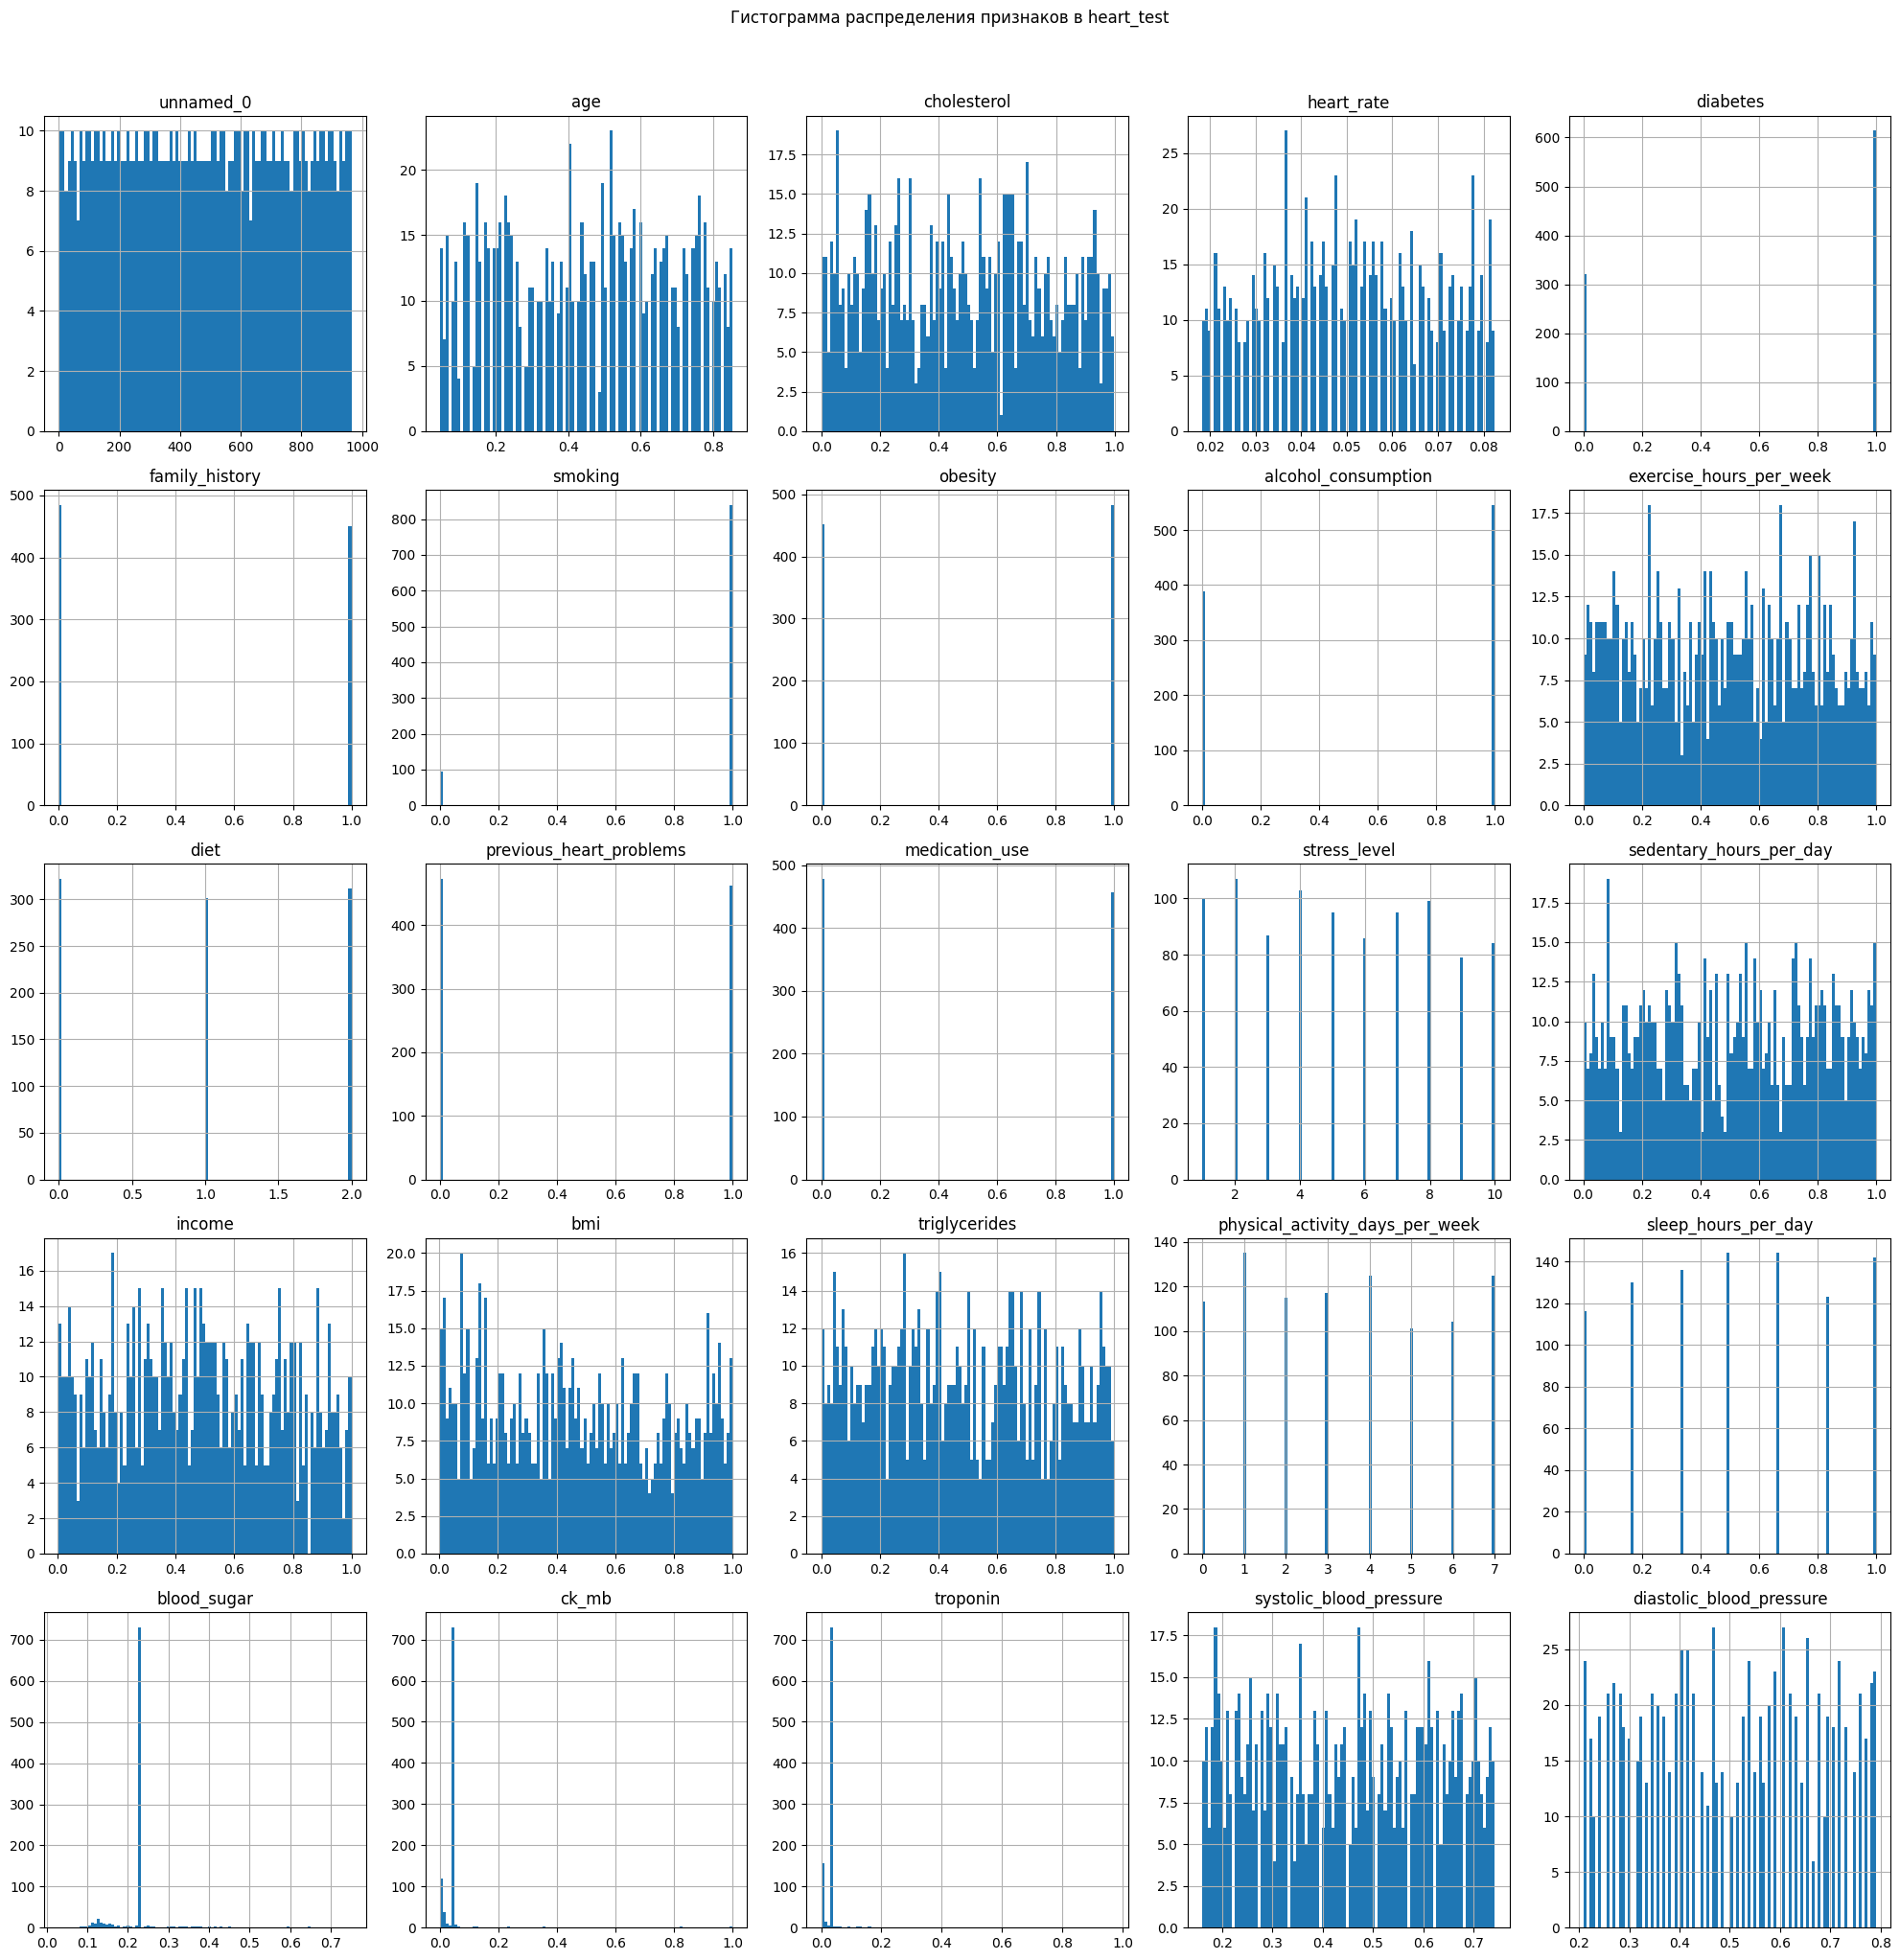

In [45]:
#построение гистограмм

heart_test.hist(figsize=(20, 20)
        , bins = 100
       );

plt.suptitle("Гистограмма распределения признаков в heart_test", fontsize=12, y=1.02)
plt.tight_layout()
plt.show()

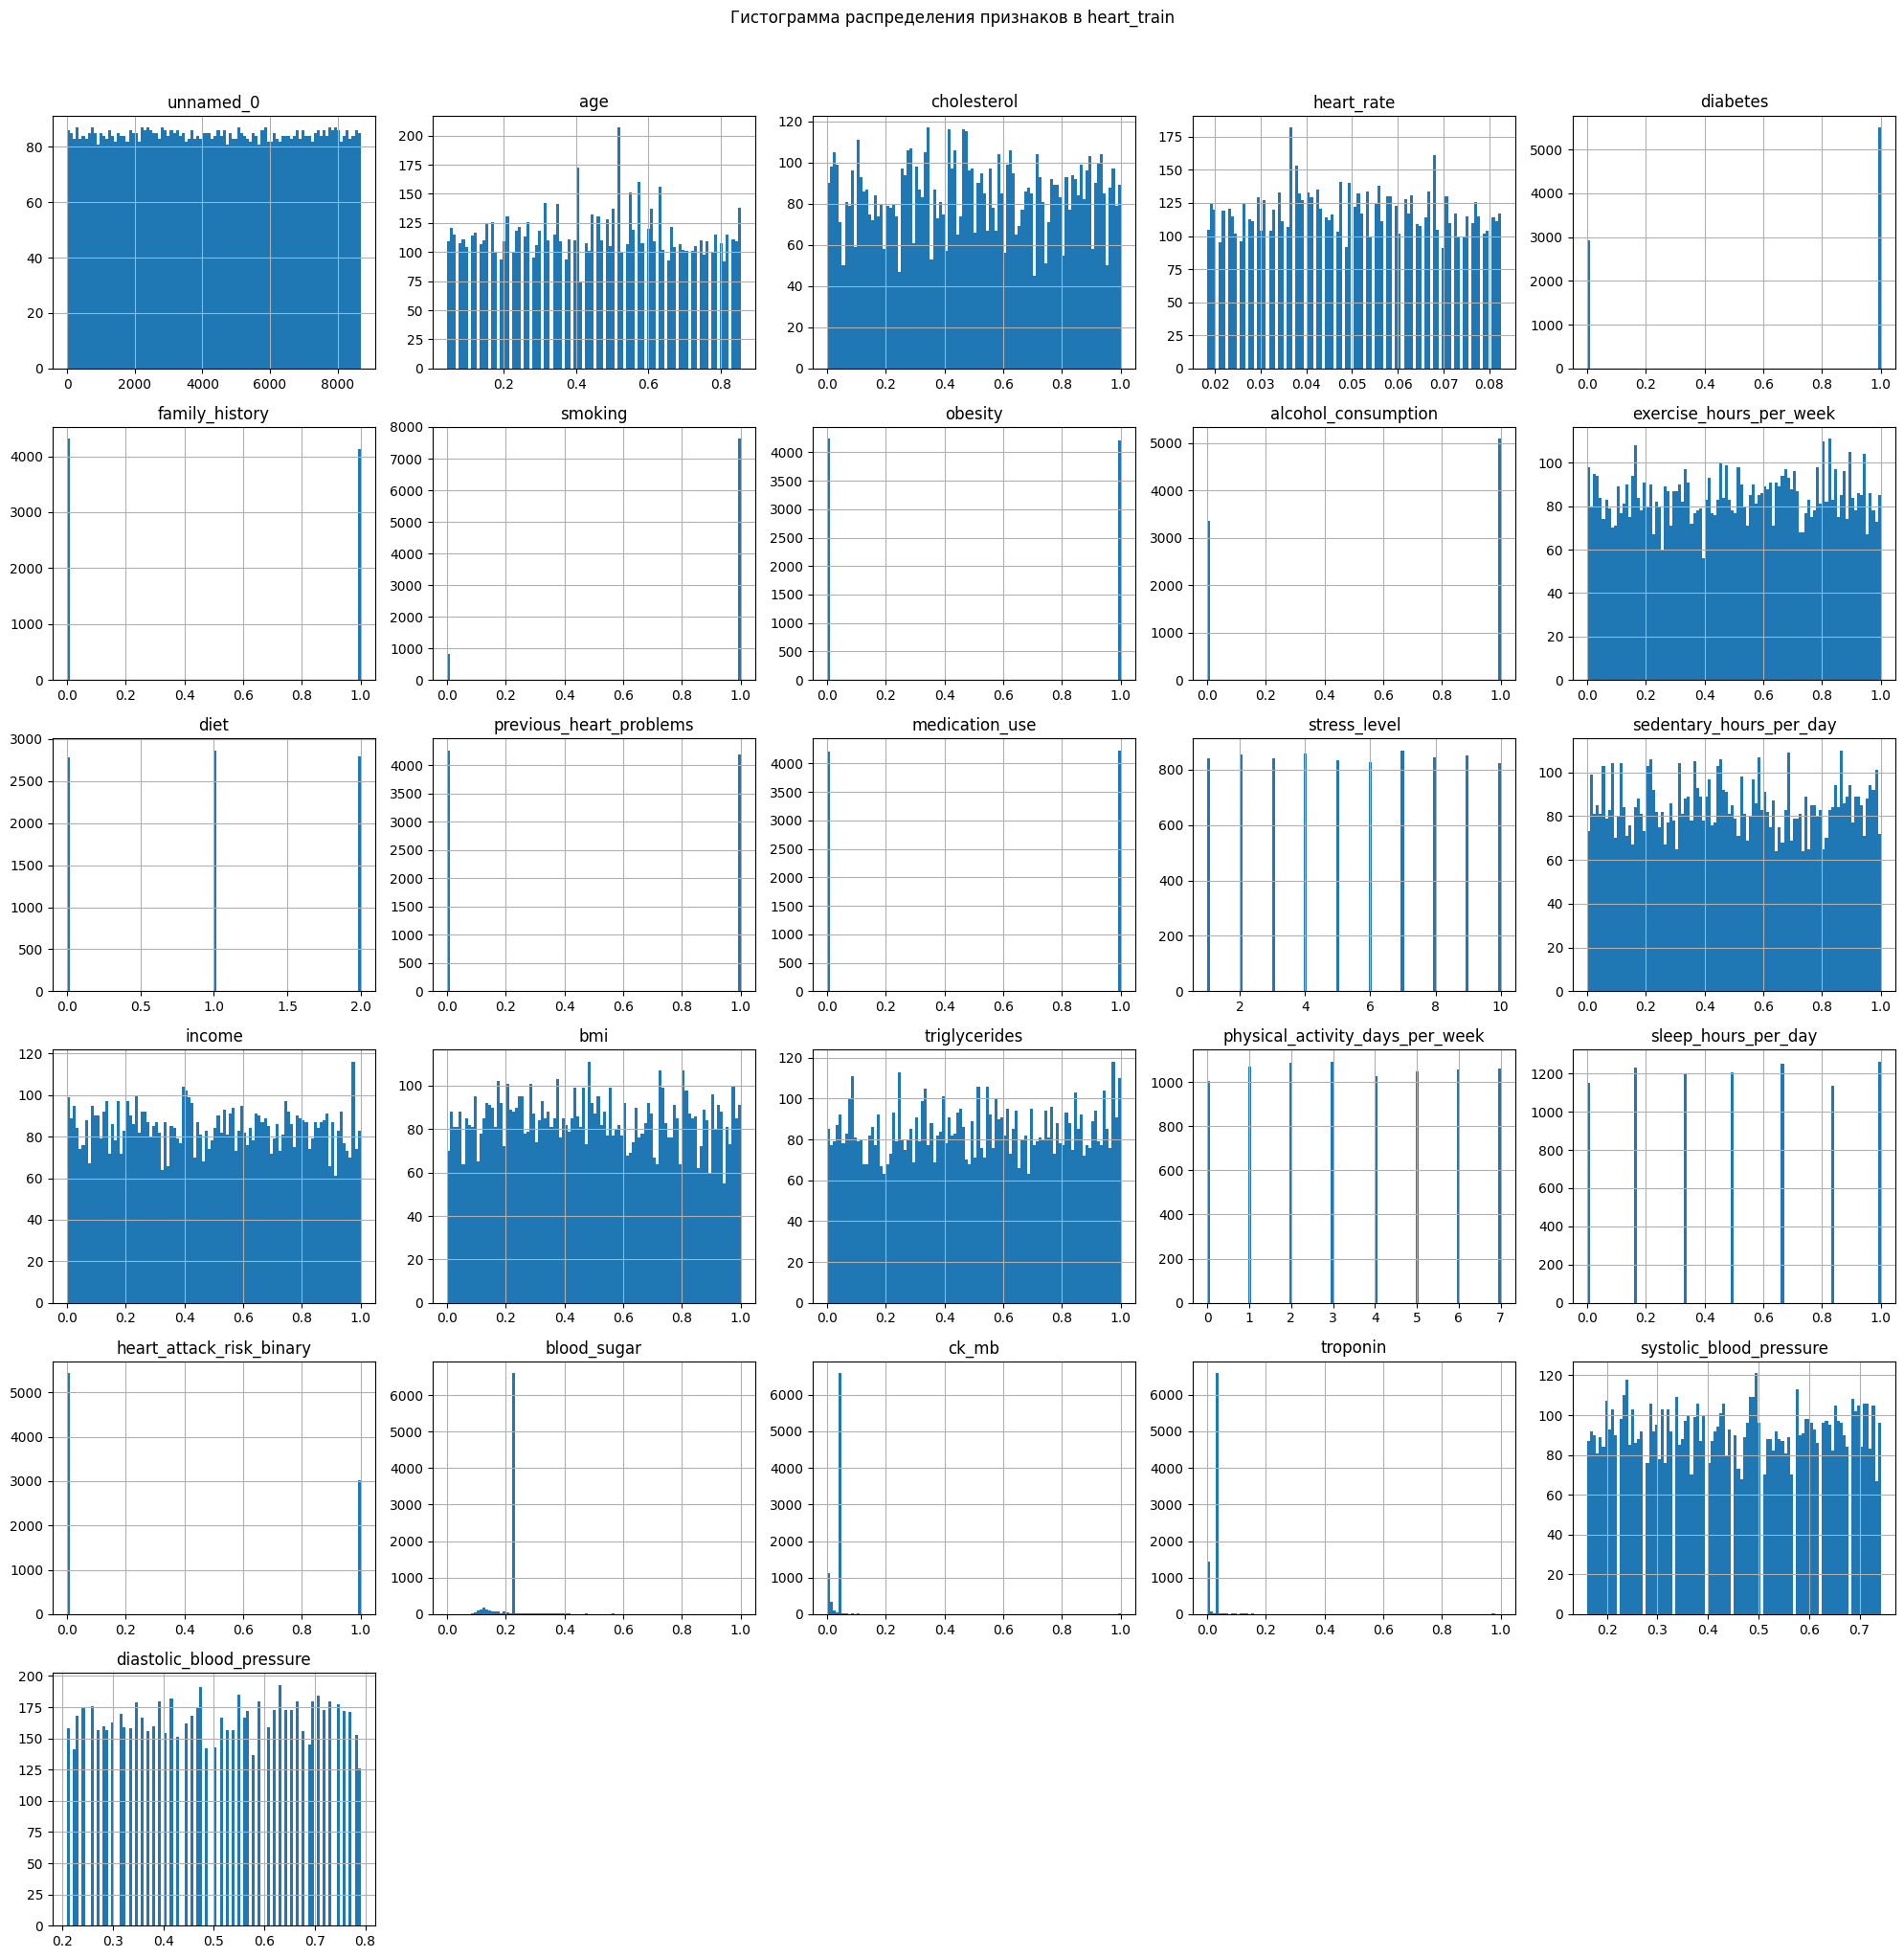

In [46]:
#построение гистограмм

heart_train.hist(figsize=(20, 20)
        , bins = 100
       );

plt.suptitle("Гистограмма распределения признаков в heart_train", fontsize=12, y=1.02)
plt.tight_layout()
plt.show()

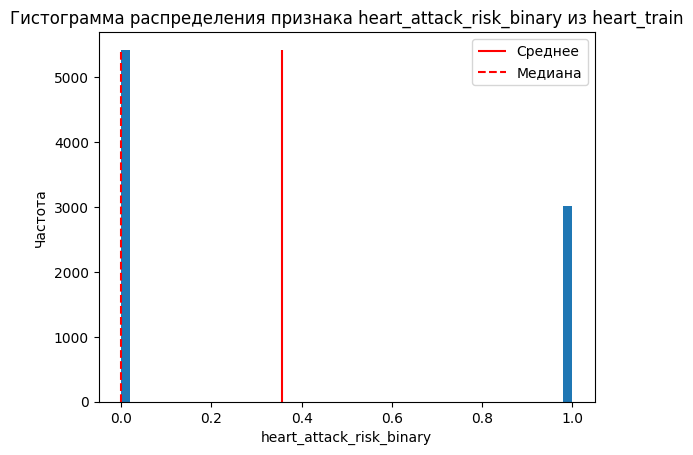

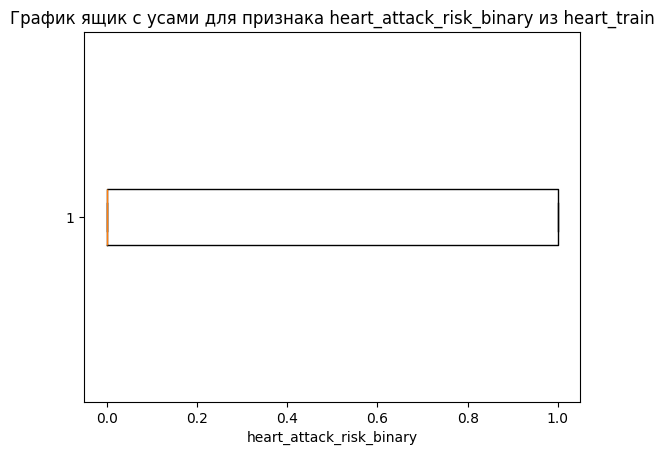

In [47]:
## визуализация распределения признака
# частотная гистограмма распределения признака с bins=50
bins = plt.hist(heart_train['heart_attack_risk_binary'], bins=50)
plt.vlines(x=heart_train['heart_attack_risk_binary'].mean(), colors='red', ymin=bins[0].min(), ymax=bins[0].max(), label='Среднее')
plt.vlines(x=heart_train['heart_attack_risk_binary'].median(), colors='red', ymin=bins[0].min(), ymax=bins[0].max(), linestyles='--', label='Медиана')
plt.title('Гистограмма распределения признака heart_attack_risk_binary из heart_train')
plt.xlabel('heart_attack_risk_binary')
plt.ylabel('Частота')
plt.legend()
plt.show()

# ящик с усами с горизонтальной ориентацией
plt.title('График ящик с усами для признака heart_attack_risk_binary из heart_train')
plt.boxplot(heart_train['heart_attack_risk_binary'], vert=False)
plt.xlabel('heart_attack_risk_binary')
plt.show()



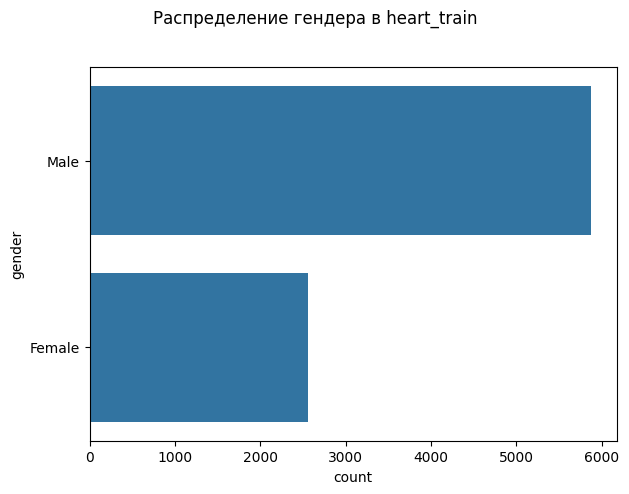

In [48]:
#countplot
sns.countplot(heart_train['gender']
             );

plt.suptitle("Распределение гендера в heart_train", fontsize=12, y=1.02)
plt.tight_layout()
plt.show()

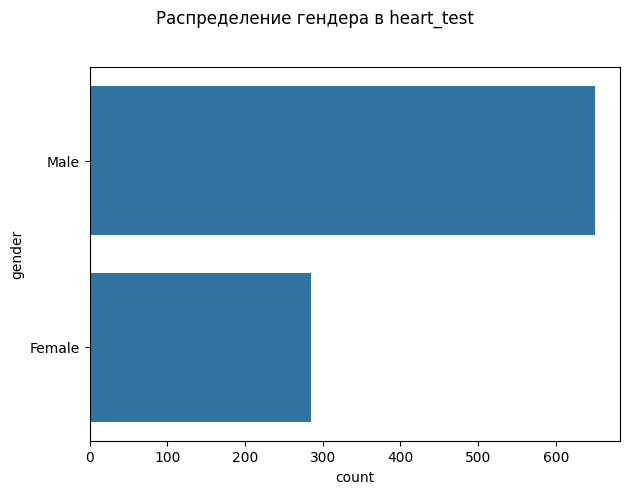

In [49]:
#countplot
sns.countplot(heart_test['gender']
             );

plt.suptitle("Распределение гендера в heart_test", fontsize=12, y=1.02)
plt.tight_layout()
plt.show()

In [50]:
# анализ значений данных 
pd.set_option('display.max_rows',None)
pivot_gender =heart_train.pivot_table(index= ['gender', 'heart_attack_risk_binary']
                                                 , values='id'
                                                 , aggfunc='count')
pivot_gender.columns =['count_id']
pivot_gender['ratio']= pivot_gender['count_id']/heart_train['id'].shape[0]
pivot_gender

count_id     ratio
gender heart_attack_risk_binary                    
Female 0.0                           1660  0.196636
       1.0                            900  0.106610
Male   0.0                           3769  0.446458
       1.0                           2113  0.250296

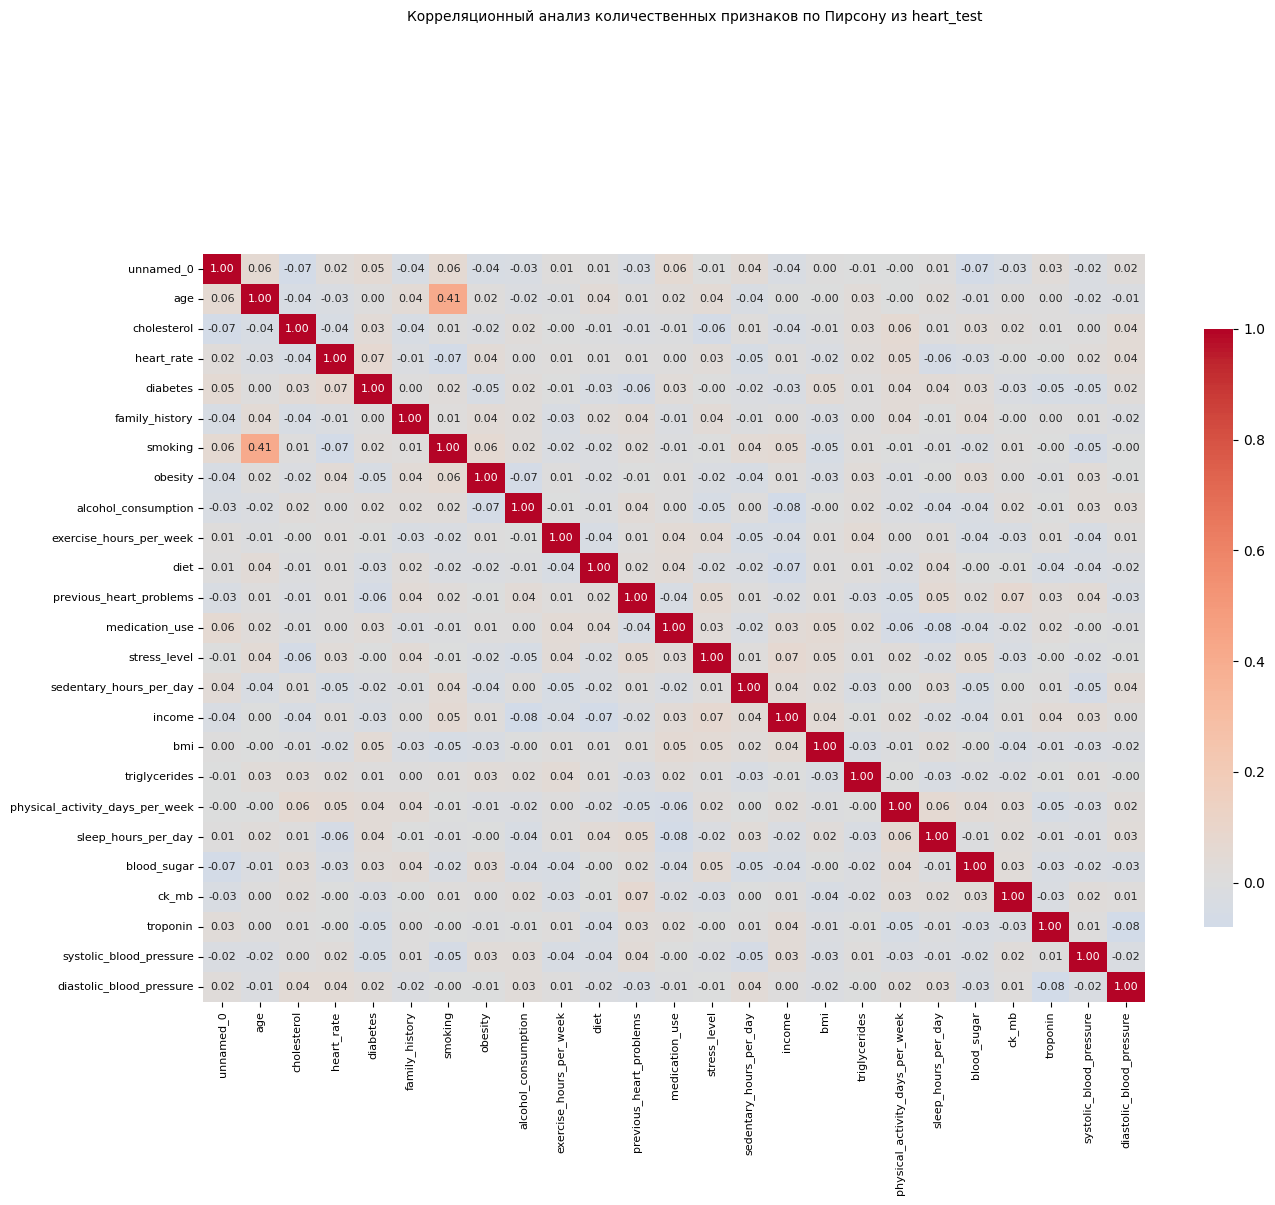

In [51]:
# корреляционный анализ количесвенных признаков по Пирсону

plt.figure(figsize=(14, 10))


sns.heatmap(heart_test.drop(['id', 'gender'], axis=1).corr(), 
            annot=True, fmt='.2f', cmap='coolwarm', center=0,
            annot_kws={"size": 8},      # размер аннотаций
            cbar_kws={"shrink": 0.8})    # размер цветовой шкалы


plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=8)

plt.suptitle("Корреляционный анализ количественных признаков по Пирсону из heart_test", fontsize=10, y=1.2)
plt.tight_layout()
plt.show();

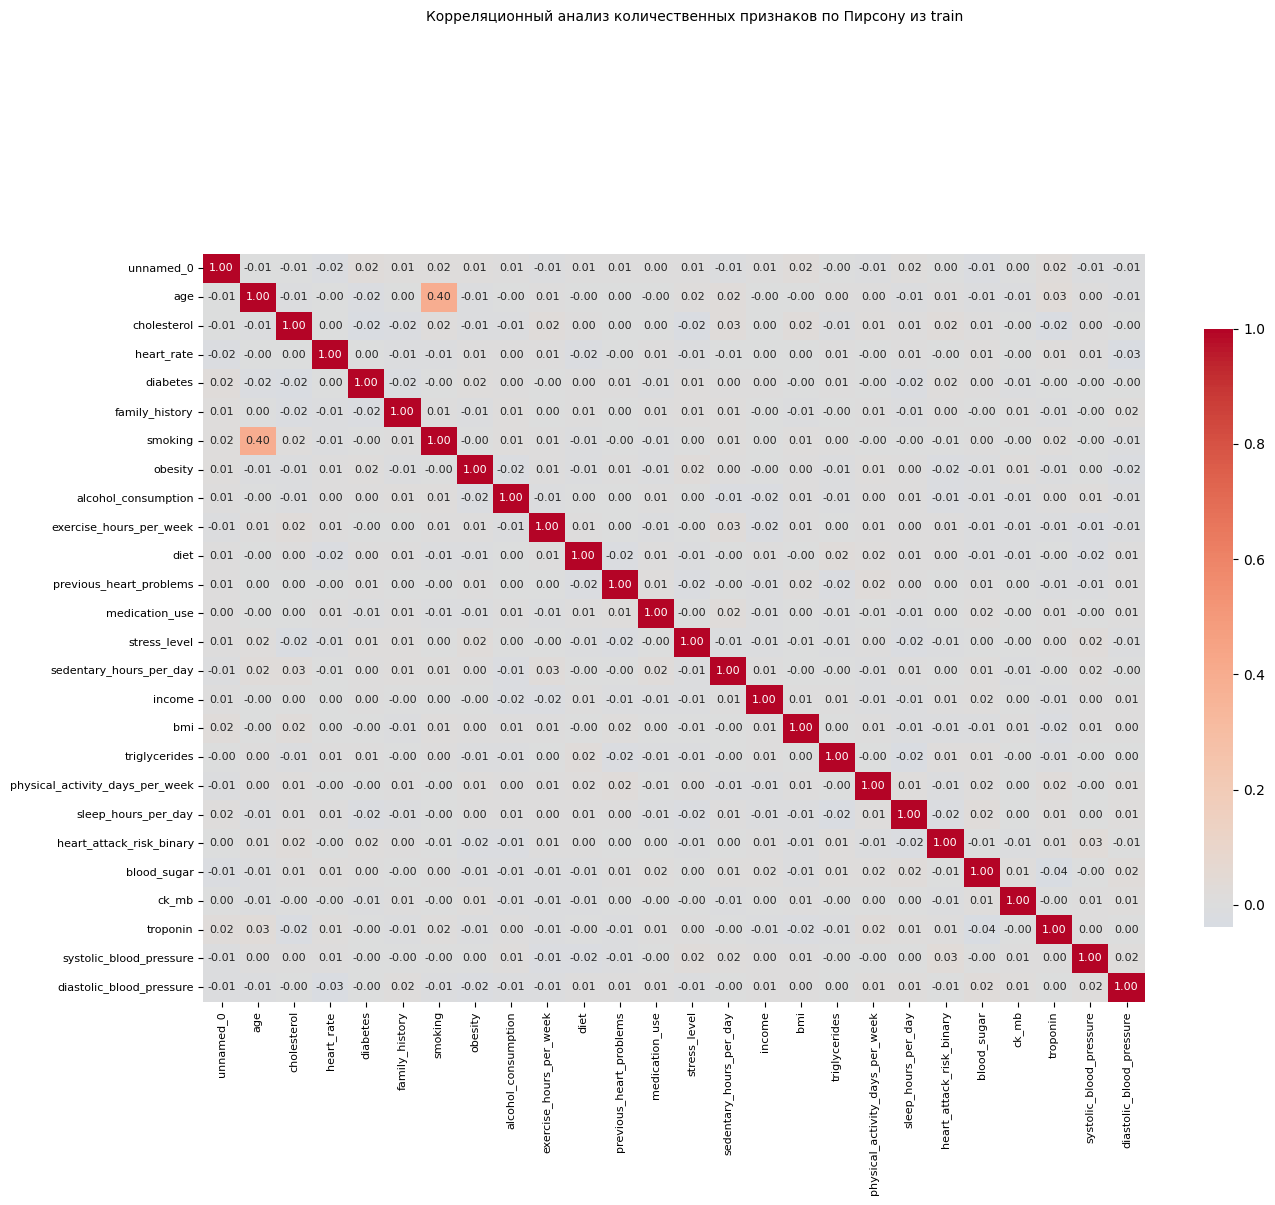

In [52]:
# корреляционный анализ количесвенных признаков по Пирсону

plt.figure(figsize=(14, 10))


sns.heatmap(heart_train.drop(['id', 'gender'], axis=1).corr(), 
            annot=True, fmt='.2f', cmap='coolwarm', center=0,
            annot_kws={"size": 8},      # размер аннотаций
            cbar_kws={"shrink": 0.8})    # размер цветовой шкалы


plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=8)

plt.suptitle("Корреляционный анализ количественных признаков по Пирсону из train", fontsize=10, y=1.2)
plt.tight_layout()
plt.show();

**Комментарий**
 
- Корреляционный анализ количественных признаков по Пирсону из heart_test: 
    - Умеренная "+" теснота связи smoking и age
    
- Корреляционный анализ количественных признаков по Пирсону из heart_train: 
    - Умеренная "+" теснота связи smoking и age

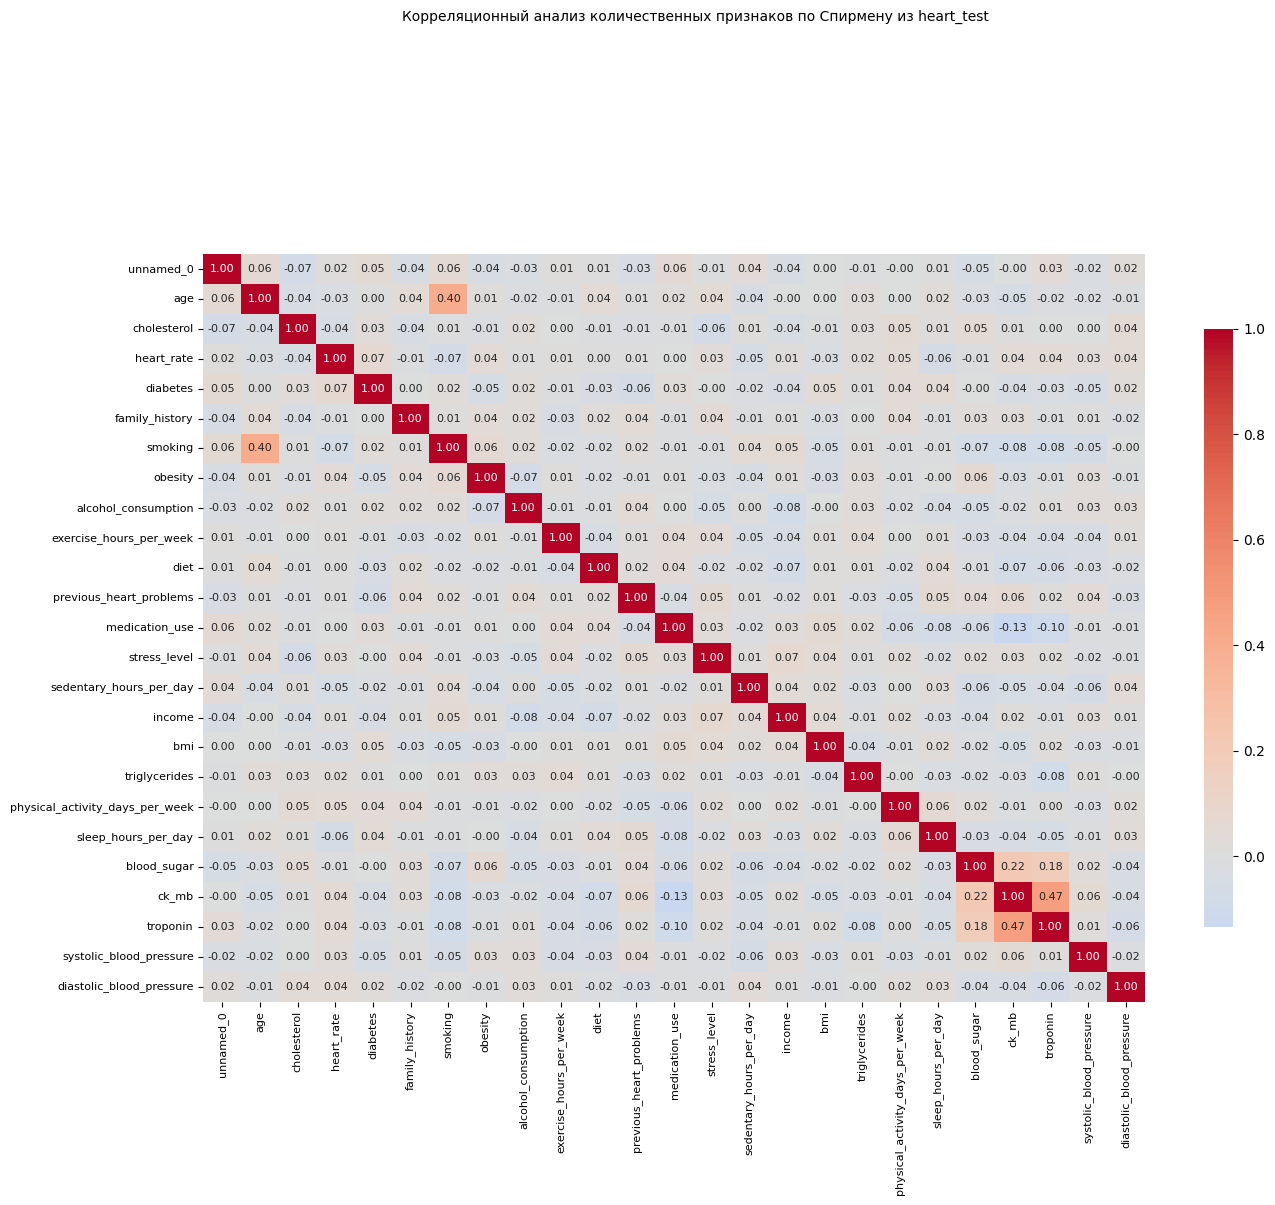

In [53]:
# корреляционный анализ количесвенных признаков по Спирмену

plt.figure(figsize=(14, 10))


sns.heatmap(heart_test.drop(['id', 'gender'], axis=1).corr(method='spearman'), 
            annot=True, fmt='.2f', cmap='coolwarm', center=0,
            annot_kws={"size": 8},      # размер аннотаций
            cbar_kws={"shrink": 0.8})    # размер цветовой шкалы


plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=8)

plt.suptitle("Корреляционный анализ количественных признаков по Спирмену из heart_test", fontsize=10, y=1.2)
plt.tight_layout()
plt.show();


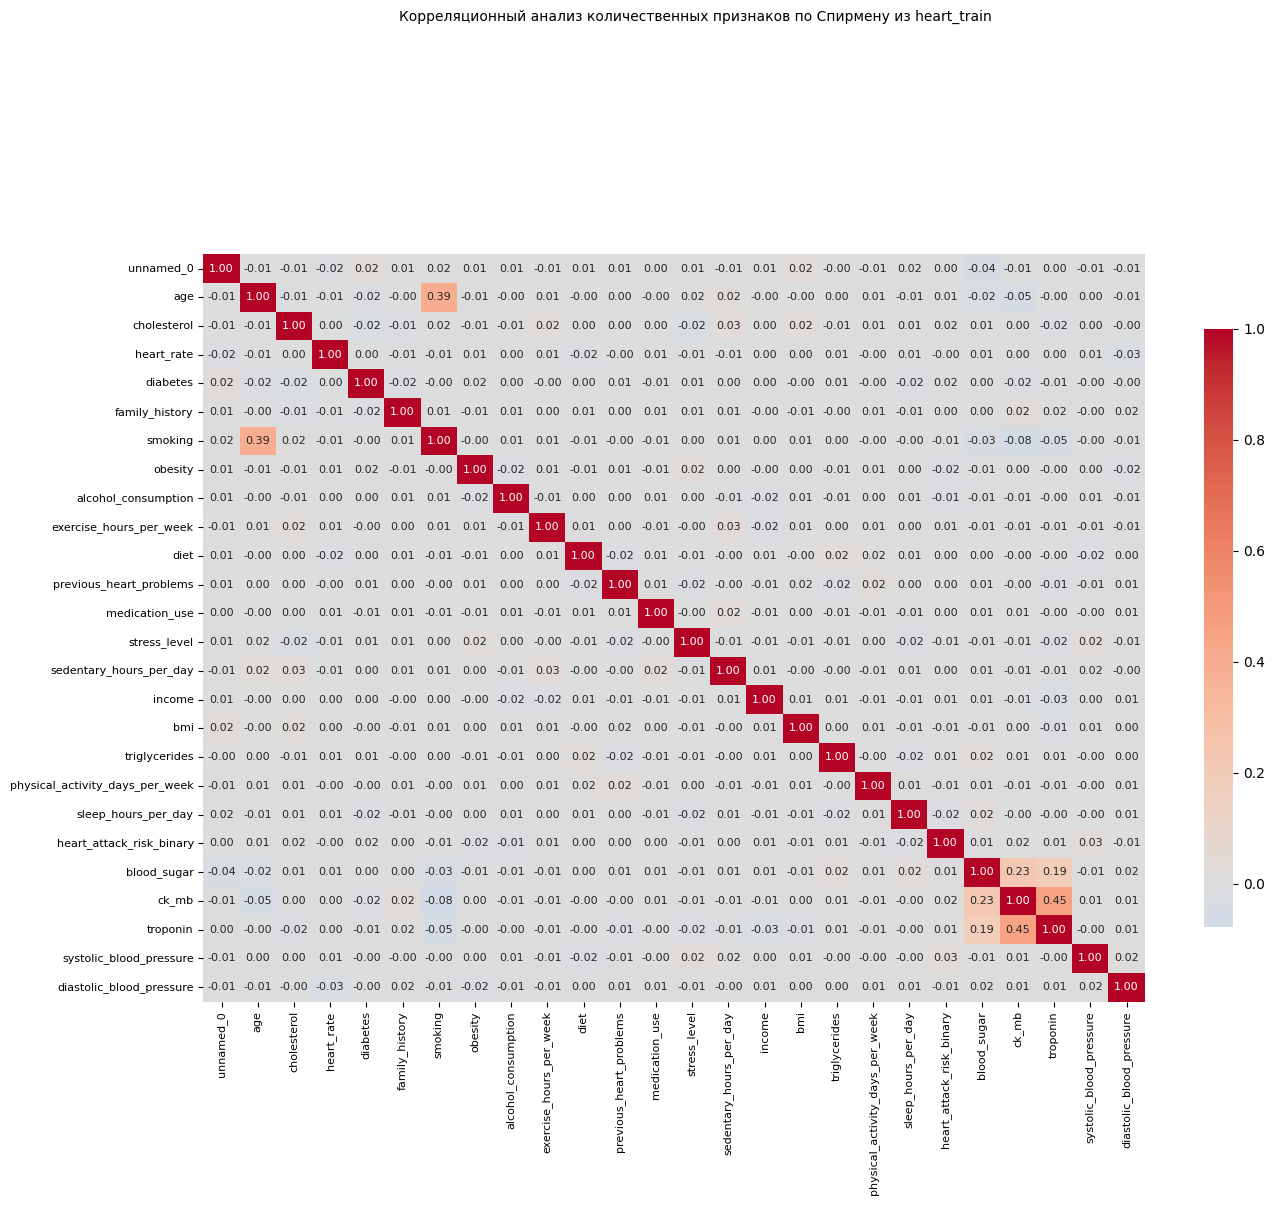

In [54]:
# корреляционный анализ количесвенных признаков по Спирмену

plt.figure(figsize=(14, 10))


sns.heatmap(heart_train.drop(['id', 'gender'], axis=1).corr(method='spearman'), 
            annot=True, fmt='.2f', cmap='coolwarm', center=0,
            annot_kws={"size": 8},      # размер аннотаций
            cbar_kws={"shrink": 0.8})    # размер цветовой шкалы


plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=8)

plt.suptitle("Корреляционный анализ количественных признаков по Спирмену из heart_train", fontsize=10, y=1.2)
plt.tight_layout()
plt.show();


In [55]:
heart_train.dtypes

unnamed_0                            int64
age                                float64
cholesterol                        float64
heart_rate                         float64
diabetes                           float64
family_history                     float64
smoking                            float64
obesity                            float64
alcohol_consumption                float64
exercise_hours_per_week            float64
diet                                 int64
previous_heart_problems            float64
medication_use                     float64
stress_level                       float64
sedentary_hours_per_day            float64
income                             float64
bmi                                float64
triglycerides                      float64
physical_activity_days_per_week    float64
sleep_hours_per_day                float64
heart_attack_risk_binary           float64
blood_sugar                        float64
ck_mb                              float64
troponin   

In [56]:
# все колонки 
heart_test.columns


Index(['unnamed_0', 'age', 'cholesterol', 'heart_rate', 'diabetes',
       'family_history', 'smoking', 'obesity', 'alcohol_consumption',
       'exercise_hours_per_week', 'diet', 'previous_heart_problems',
       'medication_use', 'stress_level', 'sedentary_hours_per_day', 'income',
       'bmi', 'triglycerides', 'physical_activity_days_per_week',
       'sleep_hours_per_day', 'blood_sugar', 'ck_mb', 'troponin', 'gender',
       'systolic_blood_pressure', 'diastolic_blood_pressure', 'id'],
      dtype='object')

In [57]:
# все колонки 
heart_train.columns

Index(['unnamed_0', 'age', 'cholesterol', 'heart_rate', 'diabetes',
       'family_history', 'smoking', 'obesity', 'alcohol_consumption',
       'exercise_hours_per_week', 'diet', 'previous_heart_problems',
       'medication_use', 'stress_level', 'sedentary_hours_per_day', 'income',
       'bmi', 'triglycerides', 'physical_activity_days_per_week',
       'sleep_hours_per_day', 'heart_attack_risk_binary', 'blood_sugar',
       'ck_mb', 'troponin', 'gender', 'systolic_blood_pressure',
       'diastolic_blood_pressure', 'id'],
      dtype='object')

In [58]:
#интервальные данные
interval_cols_test = [ 'age', 'cholesterol', 'heart_rate'
                 , 'diabetes', 'family_history', 'smoking', 'obesity', 'alcohol_consumption'
                 , 'exercise_hours_per_week', 'diet', 'previous_heart_problems', 'medication_use'
                 , 'stress_level', 'sedentary_hours_per_day', 'income', 'bmi', 'triglycerides'
                 , 'physical_activity_days_per_week', 'sleep_hours_per_day', 'blood_sugar', 'ck_mb'
                 , 'troponin', 'systolic_blood_pressure', 'diastolic_blood_pressure'
                ]

interval_cols_train = [ 'age', 'cholesterol', 'heart_rate'
                 , 'diabetes', 'family_history', 'smoking', 'obesity', 'alcohol_consumption'
                 , 'exercise_hours_per_week', 'diet', 'previous_heart_problems', 'medication_use'
                 , 'stress_level', 'sedentary_hours_per_day', 'income', 'bmi', 'triglycerides'
                 , 'physical_activity_days_per_week', 'sleep_hours_per_day', 'heart_attack_risk_binary','blood_sugar', 'ck_mb'
                 , 'troponin', 'systolic_blood_pressure', 'diastolic_blood_pressure'
                ]

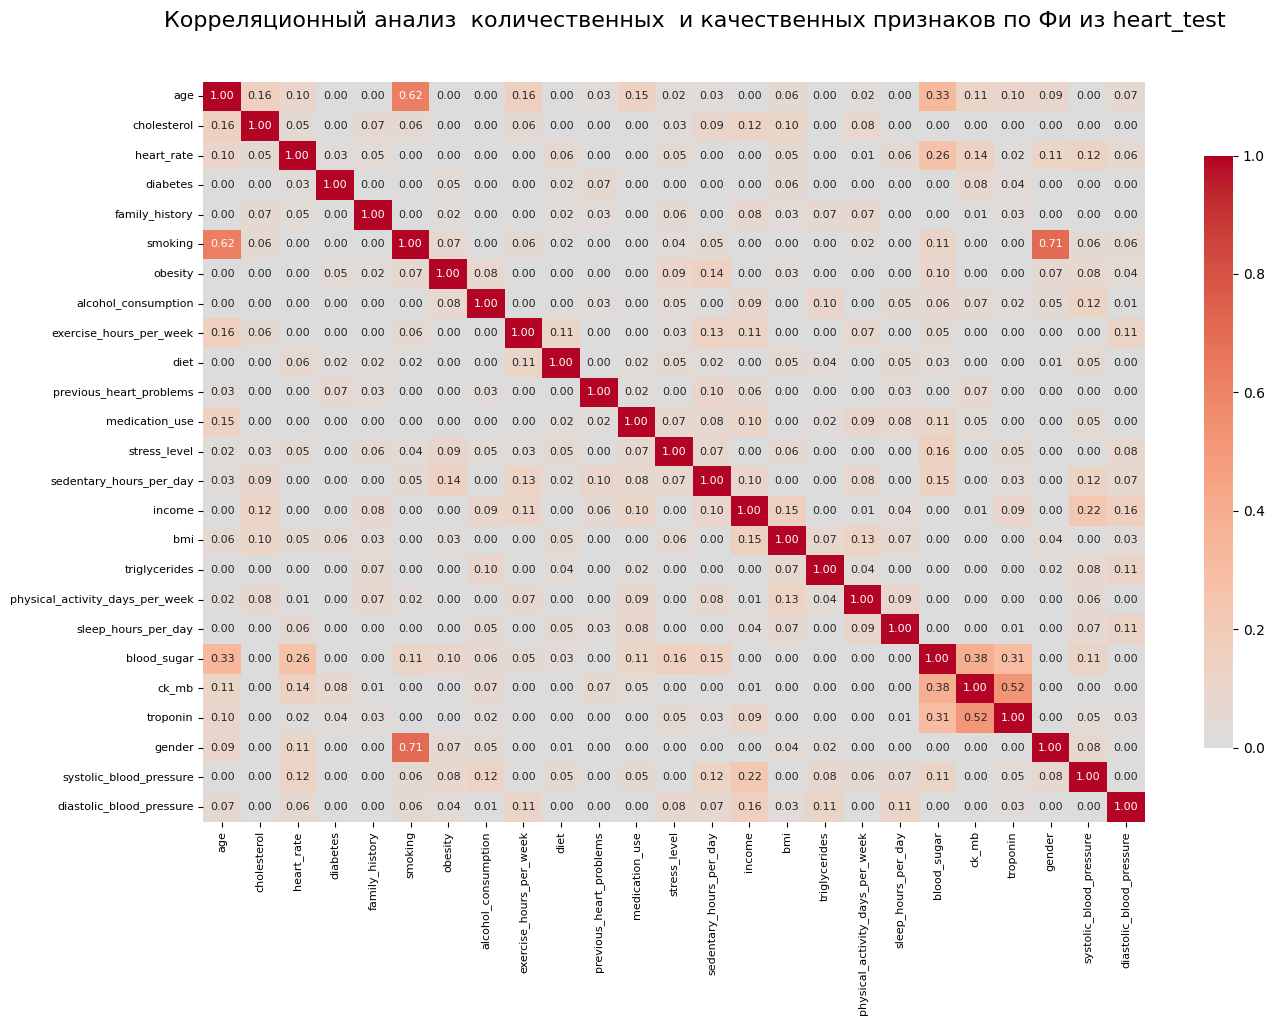

In [59]:
# корреляционный анализ количественных  и качественных признаков

corr_phik_test = heart_test.drop(['id','unnamed_0'], axis=1).phik_matrix(interval_cols = interval_cols_test)

plt.figure(figsize=(14, 10))

sns.heatmap(corr_phik_test, annot=True, fmt='.2f', cmap='coolwarm', center=0,
                       annot_kws={"size": 8},      # размер аннотаций
            cbar_kws={"shrink": 0.8})    # размер цветовой шкалы


plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=8)

plt.suptitle("Корреляционный анализ  количественных  и качественных признаков по Фи из heart_test", fontsize=16, y=1.02);
plt.tight_layout()
plt.show();

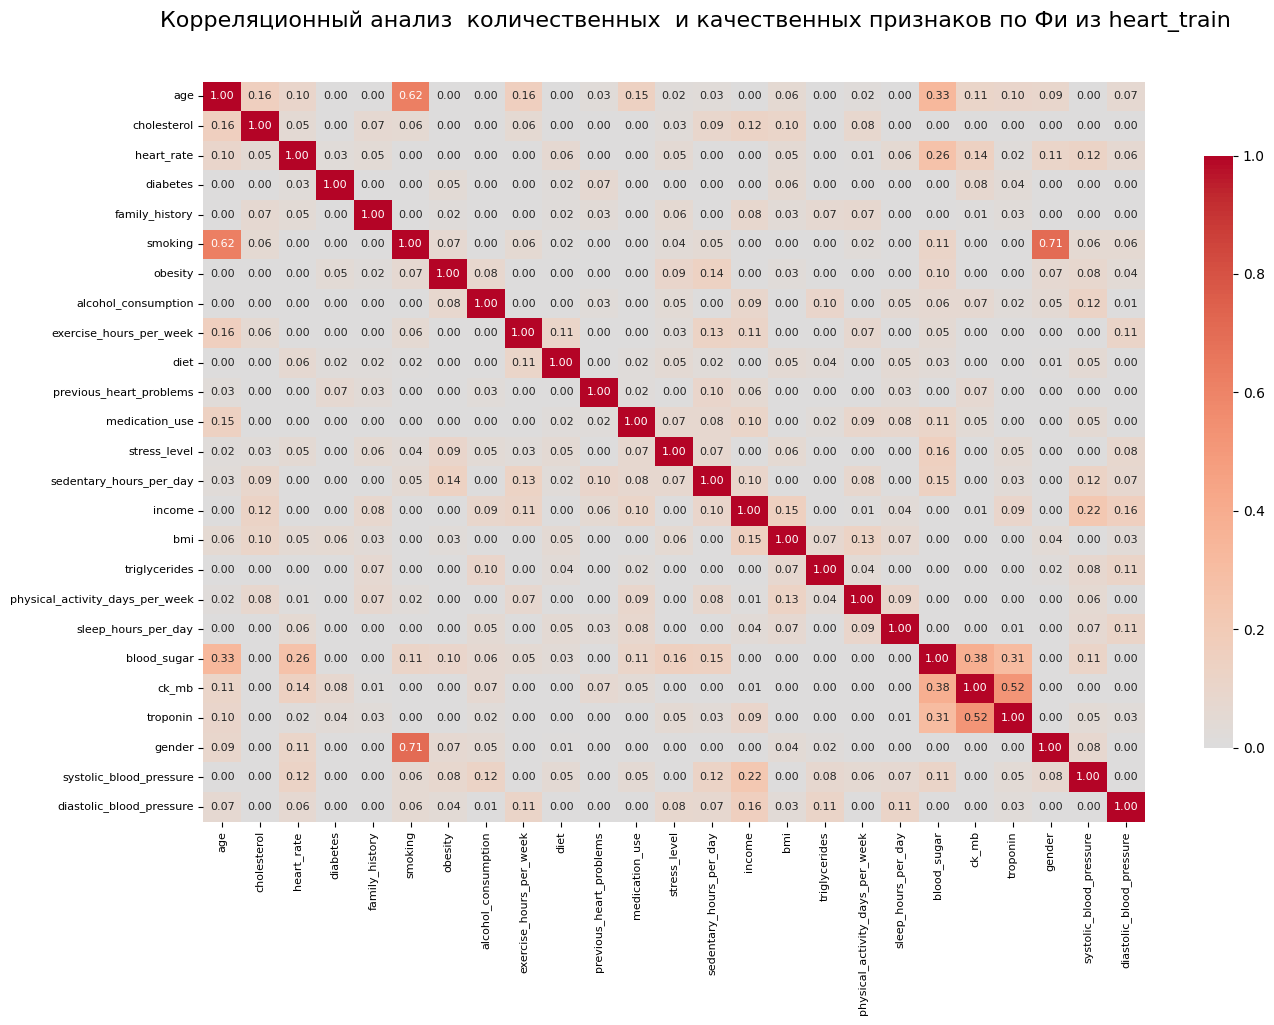

In [60]:
# корреляционный анализ количественных  и качественных признаков

corr_phik_train = heart_test.drop(['id','unnamed_0'], axis=1).phik_matrix(interval_cols = interval_cols_train)

plt.figure(figsize=(14, 10))

sns.heatmap(corr_phik_train, annot=True, fmt='.2f', cmap='coolwarm', center=0,
                       annot_kws={"size": 8},      # размер аннотаций
            cbar_kws={"shrink": 0.8})    # размер цветовой шкалы


plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=8)

plt.suptitle("Корреляционный анализ  количественных  и качественных признаков по Фи из heart_train", fontsize=16, y=1.02);
plt.tight_layout()
plt.show();

In [61]:
#новые датафреймы
heart_train_heart_attack = heart_train.query('heart_attack_risk_binary == 1')
heart_train_no_heart_attack = heart_train.query('heart_attack_risk_binary == 0')

In [62]:
#разброс значений
#pd.set_option('display.max_columns', None)
heart_train_heart_attack.describe()

,unnamed_0,age,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,diet,previous_heart_problems,medication_use,stress_level,sedentary_hours_per_day,income,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,heart_attack_risk_binary,blood_sugar,ck_mb,troponin,systolic_blood_pressure,diastolic_blood_pressure
count,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.0,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000
mean,4344.246266,0.451433,0.508461,0.050157,0.662463,0.491537,0.900763,0.488218,0.592433,0.507085,1.004978,0.496515,0.501494,5.471291,0.499857,0.499265,0.494128,0.510223,3.469963,0.494966,1.0,0.227455,0.047141,0.037317,0.458178,0.500455
std,2503.210847,0.234723,0.289751,0.018537,0.472948,0.500011,0.299029,0.499944,0.491463,0.288750,0.805634,0.500071,0.500081,2.837730,0.290479,0.288703,0.287795,0.292457,2.305699,0.331005,0.0,0.071962,0.064501,0.065166,0.169725,0.168934
min,3.000000,0.044944,0.000000,0.018332,0.000000,0.000000,0.000000,0.000000,0.000000,0.000133,0.000000,0.000000,0.000000,1.000000,0.000022,0.001676,0.000963,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000097,0.161290,0.209302
25%,2185.000000,0.247191,0.267857,0.033914,0.000000,0.000000,1.000000,0.000000,0.000000,0.255758,0.000000,0.000000,0.000000,3.000000,0.250695,0.247603,0.244488,0.257143,1.000000,0.166667,1.0,0.227018,0.048229,0.036512,0.316129,0.348837
50%,4338.000000,0.460674,0.503571,0.050412,1.000000,0.000000,1.000000,0.000000,1.000000,0.518336,1.000000,0.000000,1.000000,5.000000,0.497913,0.502401,0.486474,0.514286,3.000000,0.500000,1.0,0.227018,0.048229,0.036512,0.458065,0.500000
75%,6505.000000,0.651685,0.764286,0.065995,1.000000,1.000000,1.000000,1.000000,1.000000,0.754813,2.000000,1.000000,1.000000,8.000000,0.749723,0.751801,0.743679,0.762338,6.000000,0.833333,1.0,0.227018,0.048229,0.036512,0.606452,0.639535
max,8679.000000,0.853933,1.000000,0.082493,1.000000,1.000000,1.000000,1.000000,1.000000,0.999915,2.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,1.0,1.000000,1.000000,0.970871,0.741935,0.790698


In [63]:
#разброс значений
#pd.set_option('display.max_columns', None)
heart_train_no_heart_attack.describe()

,unnamed_0,age,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,diet,previous_heart_problems,medication_use,stress_level,sedentary_hours_per_day,income,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,heart_attack_risk_binary,blood_sugar,ck_mb,troponin,systolic_blood_pressure,diastolic_blood_pressure
count,5429.000000,5429.000000,5429.000000,5429.000000,5429.000000,5429.000000,5429.000000,5429.00000,5429.000000,5429.000000,5429.000000,5429.000000,5429.000000,5429.000000,5429.000000,5429.000000,5429.000000,5429.000000,5429.000000,5429.000000,5429.0,5429.000000,5429.000000,5429.000000,5429.000000,5429.000000
mean,4339.633266,0.447662,0.497027,0.050215,0.646344,0.488488,0.904034,0.50396,0.607294,0.501378,0.999632,0.494750,0.501013,5.505618,0.498746,0.494326,0.498331,0.502939,3.529563,0.508565,0.0,0.228300,0.048080,0.036618,0.448501,0.502347
std,2512.782680,0.231750,0.288193,0.018390,0.478148,0.499913,0.294572,0.50003,0.488397,0.288960,0.817098,0.500018,0.500045,2.884636,0.288854,0.288813,0.285949,0.289265,2.268318,0.333645,0.0,0.076064,0.073472,0.055758,0.170359,0.171069
min,0.000000,0.044944,0.000000,0.018332,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000080,0.000000,0.161290,0.209302
25%,2174.000000,0.247191,0.257143,0.034830,0.000000,0.000000,1.000000,0.00000,0.000000,0.252158,0.000000,0.000000,0.000000,3.000000,0.246833,0.241833,0.251518,0.257143,2.000000,0.166667,0.0,0.227018,0.048229,0.036512,0.296774,0.348837
50%,4335.000000,0.449438,0.492857,0.050412,1.000000,0.000000,1.000000,1.00000,1.000000,0.502872,1.000000,0.000000,1.000000,6.000000,0.491115,0.491847,0.492713,0.502597,3.000000,0.500000,0.0,0.227018,0.048229,0.036512,0.445161,0.500000
75%,6530.000000,0.629213,0.746429,0.065995,1.000000,1.000000,1.000000,1.00000,1.000000,0.754962,2.000000,1.000000,1.000000,8.000000,0.751948,0.745009,0.744528,0.757143,6.000000,0.833333,0.0,0.227018,0.048229,0.036512,0.600000,0.651163
max,8684.000000,0.853933,1.000000,0.082493,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,2.000000,1.000000,1.000000,10.000000,0.999419,0.999775,0.999835,1.000000,7.000000,1.000000,0.0,0.918972,1.000000,1.000000,0.741935,0.790698


C:\Users\aeroflot\AppData\Local\Programs\Python\Python311\Lib\site-packages\phik\data_quality.py:82: UserWarning: Not enough unique value for variable heart_attack_risk_binary for analysis 1. Dropping this column
  warnings.warn(


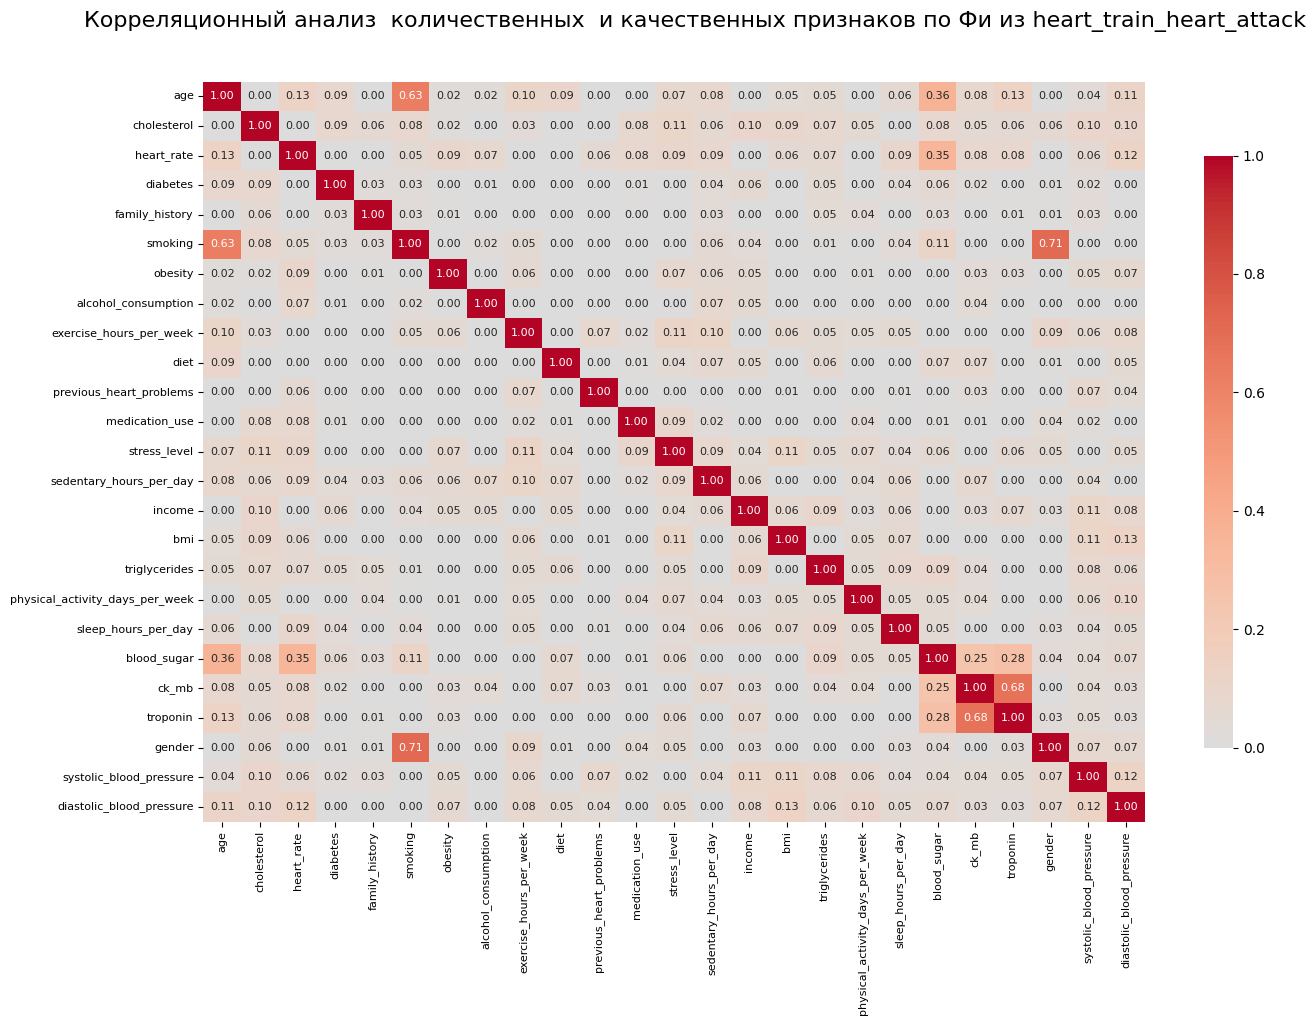

In [64]:
# корреляционный анализ количественных  и качественных признаков

corr_phik_test_heart_attack = heart_train_heart_attack.drop(['id','unnamed_0'], axis=1).phik_matrix(interval_cols = interval_cols_test)

plt.figure(figsize=(14, 10))

sns.heatmap(corr_phik_test_heart_attack, annot=True, fmt='.2f', cmap='coolwarm', center=0,
                       annot_kws={"size": 8},      # размер аннотаций
                        cbar_kws={"shrink": 0.8})    # размер цветовой шкалы


plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=8)

plt.suptitle("Корреляционный анализ  количественных  и качественных признаков по Фи из heart_train_heart_attack", fontsize=16, y=1.02);
plt.tight_layout()
plt.show();

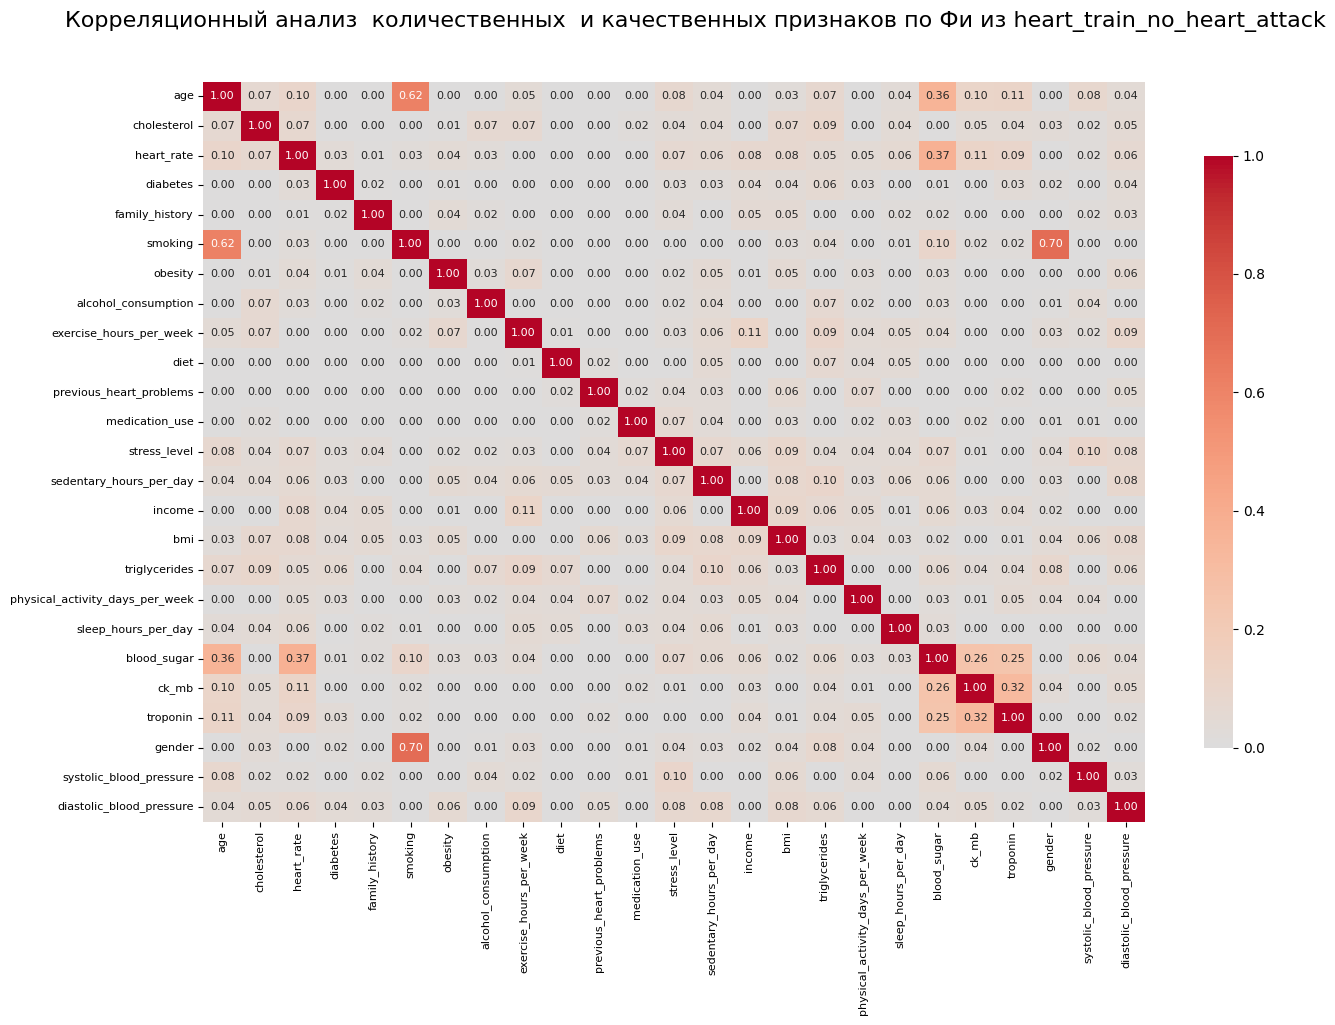

In [65]:
# корреляционный анализ количественных  и качественных признаков

corr_phik_test_no_heart_attack = heart_train_no_heart_attack.drop(['id','unnamed_0', 'heart_attack_risk_binary'], axis=1).phik_matrix(interval_cols = interval_cols_test)

plt.figure(figsize=(14, 10))

sns.heatmap(corr_phik_test_no_heart_attack, annot=True, fmt='.2f', cmap='coolwarm', center=0,
                        annot_kws={"size": 8},      # размер аннотаций
                        cbar_kws={"shrink": 0.8})    # размер цветовой шкалы


plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=8)

plt.suptitle("Корреляционный анализ  количественных  и качественных признаков по Фи из heart_train_no_heart_attack", fontsize=16, y=1.02);
plt.tight_layout()
plt.show();

**Выводы**

- Разброс данных в heart_train и heart_test примерно одинаковые
- Корреляционный анализ количественных признаков по Пирсону
    - Умеренная "+" теснота связи smoking и age из heart_test
    - Умеренная "+" теснота связи smoking и age из heart_train
         =>  явной мультиколлинеарности нет.
- Корреляционный анализ количественных признаков по Спирмену
    - Умеренная "+" теснота связи smoking и age из heart_test
    - Умеренная "+" теснота связи smoking и age из heart_train
    - Умеренная "+" теснота связи troponin и ck_mb из heart_test
    - Умеренная "+" теснота связи troponin и ck_mb из heart_train
         =>  явной мультиколлинеарности нет.
- Корреляционный анализ количественных и качественных признаков по Фи
    - Умеренная "+" теснота связи smoking и age из heart_test
    - Умеренная "+" теснота связи smoking и age из heart_train
    - Высокая "+" теснота связи smoking и gender из heart_test
    - Высокая "+" теснота связи smoking и gender из heart_train
    - Умеренная "+" теснота связи troponin и ck_mb из heart_test
    - Умеренная "+" теснота связи troponin и ck_mb из heart_train
         =>  мультиколлинеарность есть между smoking и gender, исключу  gender далее       
- О мультиколлинеарности говорят при значении коэффициента корреляции от 0.9 до 0.95 по модулю. В такой ситуации лишние коррелирующие признаки нужно удалять из обучающей выборки. Высокая "+" теснота связи smoking и gender, исключу  gender далее 
- Риск сердечного приступа
    - выше у мужчин, чем у женщин
- У людей с сердечным приступом в среднем  (сравнение по mean)
    - на 3% ниже obesity
    - на 2% ниже alcohol_consumption
    - на 2% ниже physical_activity_days_per_week
    - на 3% ниже sleep_hours_per_day
    - на 2% выше cholesterol
    - на 2% выше diabetes
    - на 2% выше troponin
    - на 2% выше systolic_blood_pressure
-  Анализ переменных
    -  1. Показатели, которые почти наверняка влияют на риск сердечного приступа (сильно коррелируют)
    Это ключевые факторы риска, подтвержденные множеством исследований.
    
    Возраст (age) — риск увеличивается с возрастом.
    
    Холестерин (cholesterol) — высокий уровень холестерина приводит к атеросклерозу.
    
    Курение (smoking) — одна из главных причин повреждения сосудов.
    
    Систолическое и диастолическое артериальное давление (systolic_blood_pressure, diastolic_blood_pressure) — гипертония напрямую нагружает сердце и сосуды.
    
    Диабет (diabetes) — диабет резко увеличивает риск сердечно-сосудистых заболеваний.
    
    Индекс массы тела (bmi) и Ожирение (obesity) — избыточный вес связан с гипертонией, диабетом и высоким холестерином.
    
    Триглицериды (triglycerides) — как и холестерин, важный показатель жиров в крови.
    
    Семейная история (family_history) — генетическая предрасположенность играет большую роль.
    
    Предыдущие проблемы с сердцем (previous_heart_problems) — например, перенесенный инфаркт или ишемическая болезнь.
    
    Уровень стресса (stress_level) — хронический стресс негативно влияет на давление и гормональный фон.
    
    Тропонин (troponin) и КК-МБ (ck_mb) — это не факторы риска, а маркеры повреждения сердца. Их высокий уровень указывает на то, что сердечный приступ уже происходит или недавно произошел. 
    
    Малоподвижный образ жизни (sedentary_hours_per_day, physical_activity_days_per_week, exercise_hours_per_week) — низкая физическая активность — прямой фактор риска.

    - 2. Показатели, которые могут влиять (второстепенные или косвенные)
    Эти факторы часто связаны с риском, но их влияние может быть опосредованным.
    
    Пульс (heart_rate) — постоянно высокий пульс в покое может быть индикатором проблем.
    
    Алкоголь (alcohol_consumption) — злоупотребление увеличивает риск, а умеренное потребление может его снижать (спорный момент).
    
    Диета (diet) — общий показатель, который сильно влияет на холестерин, давление и вес.
    
    Использование лекарств (medication_use) — может быть как индикатором существующих проблем (например, прием лекарств от давления), так и фактором снижения риска.
    
    Доход (income) — социально-экономический статус косвенно влияет на доступ к медицине, качество питания и уровень стресса.
    
    Сон (sleep_hours_per_day) — недостаток или избыток сна связан с повышенным риском.
    
    Уровень сахара в крови (blood_sugar) — тесно связан с диабетом и преддиабетным состоянием.
    
    Пол (gender) — мужчины traditionally имеют более высокий риск в более молодом возрасте, но у женщин риск возрастает после менопаузы и часто протекает с другими симптомами.

3. Показатели, которые почти наверняка НЕ влияют напрямую (технические или нерелевантные)
id — уникальный идентификатор пациента, случайное число.

unnamed_0 — скорее всего, артефакт при выгрузке данных (например, старый индекс). Не несет информации.

heart_attack_risk_binary — это целевая переменная (то, что мы пытаемся предсказать). Она не "влияет" на риск, она является его результатом.


## Шаг 4. Обучение модели

In [66]:
# количество строк-дубликатов в данных (должно быть ноль)
heart_train_no_id = heart_train.drop(['id', 'unnamed_0'], axis=1)
heart_train_no_id.duplicated().sum()

np.int64(0)

In [67]:
# количество строк-дубликатов в данных (должно быть ноль)
heart_test_no_id = heart_test.drop(['id', 'unnamed_0' ], axis=1)
heart_test_no_id.duplicated().sum()

np.int64(0)

**Комментарий**

Т.о, исключаем из начального датасета 
- unnamed_0 — скорее всего, артефакт при выгрузке данных (например, старый индекс). Не несет информации.
- obesity - ожирение свзян с bmi индекс массы тела, но индекс массы тела небинарный , в нем больше информации
- troponin Тропонин и ck_mb КК-МБ — это не факторы риска, а маркеры повреждения сердца. Их высокий уровень указывает на то, что сердечный приступ уже происходит или недавно произошел.
- medication_use Использование лекарств — может быть как индикатором существующих проблем (например, прием лекарств от давления), так и фактором снижения риска.
- income - доход напрямую не связан с риском здоровья

In [68]:
#фреймы без лишних переменных
heart_test_model = heart_test.drop([ 'unnamed_0' 
                                     #, 'gender' 
                                     , 'obesity'
                                     , 'ck_mb'
                                     , 'troponin'
                                     #, 'sedentary_hours_per_day'
                                     #, 'physical_activity_days_per_week'
                                     , 'medication_use'
                                     # , 'age'
                                     #,'heart_rate'
                                     , 'income'
                                   ], axis=1)

heart_train_model = heart_train.drop([ 'unnamed_0' 
                                    #, 'gender' 
                                    , 'obesity'     
                                    , 'ck_mb'  
                                   , 'troponin'
                                    # , 'sedentary_hours_per_day'
                                     #, 'physical_activity_days_per_week'   
                                     , 'medication_use'
                                     ##, 'age'
                                     #,'heart_rate'
                                     , 'income'
                                   ], axis=1)
print (heart_test_model.duplicated().sum())# количество строк-дубликатов в данных (должно быть ноль)
print (heart_train_model.duplicated().sum())# количество строк-дубликатов в данных (должно быть ноль)

0
0


In [69]:
#train split на базе heart_train

RANDOM_STATE = 42
TEST_SIZE = 0.2

# загружаем данные

X_train, X_test, y_train, y_test = train_test_split(
    heart_train_model.drop(['heart_attack_risk_binary', 'id'
              ], axis=1),
    heart_train_model['heart_attack_risk_binary'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = heart_train_model['heart_attack_risk_binary']
)

X_train.shape, X_test.shape,y_train.shape, y_test.shape

((6753, 20), (1689, 20), (6753,), (1689,))

In [70]:
# версия 1 

# создаём списки с названиями признаков
ohe_columns = [   'diabetes'
                , 'family_history'
                , 'smoking'
                #, 'obesity'
                , 'alcohol_consumption'
                , 'diet'
                , 'previous_heart_problems'
                #, 'medication_use'
                #, 'gender'
              ]

#ord_columns = ['column_name'] 

num_columns = [  #  'age',
                  'cholesterol'
                , 'heart_rate'
                , 'exercise_hours_per_week'
                , 'stress_level'
                 , 'sedentary_hours_per_day'
                , 'income'
                , 'bmi'
                , 'triglycerides'
                 #, 'physical_activity_days_per_week'
                , 'sleep_hours_per_day'
                , 'blood_sugar'
                #, 'ck_mb'
                #, 'troponin'
                , 'systolic_blood_pressure'
                , 'diastolic_blood_pressure'
              ]

# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')), #'most_frequent'
     ('ohe', OneHotEncoder(drop='first', handle_unknown='error'))  # , sparse=False - убираем (если библитоека новая !pip install -U scikit-learn )handle_unknown='error' - при появлении новых категорий в тестовых данных пайплайн упадёт с ошибкой.
])

# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
#ord_pipe = Pipeline(
#    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
#     ('ord',  OrdinalEncoder(
#                categories=[
#                    ['да', 'нет']
#                ], 
#                handle_unknown='use_encoded_value', unknown_value=np.nan
#           )
#        ),
#     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
#    ]
#)

# обработка числовых признаков
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', 'passthrough')
])


# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer([
    ('ohe', ohe_pipe, ohe_columns),
    ('num', num_pipe, num_columns) #MinMaxScaler(), num_columns
], remainder='passthrough')

# пайплайн с ImbPipeline
pipe_final = ImbPipeline([
    ('preprocessor', data_preprocessor),
    ('smote', SMOTE(random_state=RANDOM_STATE)), #для борьбы с дисбалансом
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
   # ,
   # ('calibration', CalibratedClassifierCV(method='sigmoid'))
])


# Обновите param_grid - добавьте параметры SMOTE
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 20),
        'models__max_features': [None, 'sqrt', 'log2'] + list(range(2, 20)),  
        'models__min_samples_split': range(2, 10),
        'models__min_samples_leaf': range(1, 5),
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],  
       # 'smote__sampling_strategy': [0.5, 0.6, 0.7, 0.8],  # вместо 1.0 (полный баланс)
        'smote__k_neighbors': [5, 7, 10]
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 50),
        'models__weights': ['uniform', 'distance'],
            #uniform – если все соседи примерно равноценны (например, данные нормализованы, и расстояния не сильно различаются).
            #distance – если ближайшие объекты важнее дальних (например, в данных есть выбросы или шум).
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
       # 'smote__sampling_strategy': [0.5, 0.6, 0.7, 0.8],  # вместо 1.0 (полный баланс)
        'smote__k_neighbors': [5, 7, 10]
    },

    # словарь для модели LinearRegression()
    {
        'models': [LinearRegression()],
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
       # 'smote__sampling_strategy': [0.5, 0.6, 0.7, 0.8],  # вместо 1.0 (полный баланс)
        'smote__k_neighbors': [5, 7, 10]
    }, 
    
    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE)],
        'models__penalty': ['l2', 'elasticnet'],
            #Для большинства задач L2 — безопасный выбор, но L1 незаменим, когда нужна простота модели и отбор признаков
            # L1 - Обнуляет неважные признаки, нестабильна к Мультиколлинеарности
            # L2 - Только уменьшает коэффициенты неважных признаков, стабильна к Мультиколлинеарности       
            # ElasticNet (L1 + L2)  - Нужен баланс между отбором признаков (L1) и устойчивостью к корреляции (L2).
        'models__solver': ['saga'], # единственный общий solver для 'models__penalty': ['l2', 'elasticnet']  
        'models__C': range(1, 10),
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
       # 'smote__sampling_strategy': [0.5, 0.6, 0.7, 0.8],  # вместо 1.0 (полный баланс)
        'smote__k_neighbors': [5, 7, 10]
    },

    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE, probability=True)],
            # Если probability=False, SVC не сможет вернуть вероятности, и вызов predict_proba() приведёт к ошибке
        'models__kernel': ['rbf','linear'], # исключены 'sigmoid','poly' для более быстрой отработки запроса
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
       # 'smote__sampling_strategy': [0.5, 0.6, 0.7, 0.8],  # вместо 1.0 (полный баланс)
        'smote__k_neighbors': [5, 7, 10]
    },
    
    # словарь для модели RandomForestClassifier
    {
        'models': [RandomForestClassifier(random_state=RANDOM_STATE)],
        'models__n_estimators': [50, 100, 200],
        'models__max_depth': [None, 10, 20],
        'models__min_samples_split': [2, 5],
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
       # 'smote__sampling_strategy': [0.5, 0.6, 0.7, 0.8],  # вместо 1.0 (полный баланс)
        'smote__k_neighbors': [5, 7, 10]
    },
    
    # словарь для модели GradientBoostingClassifier
    {
        'models': [GradientBoostingClassifier(random_state=RANDOM_STATE)],
        'models__n_estimators': [50, 100],
        'models__learning_rate': [0.01, 0.1, 0.2],
        'models__max_depth': [3, 5],
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
        #'smote__sampling_strategy': [0.5, 0.6, 0.7, 0.8],  # вместо 1.0 (полный баланс)
        'smote__k_neighbors': [5, 7, 10]  
    },
    
    # словарь для модели XGBClassifier   
    {
        'models': [XGBClassifier(random_state=RANDOM_STATE, eval_metric='logloss')],
        'models__n_estimators': [50, 100],
        'models__max_depth': [3, 5, 7],
        'models__learning_rate': [0.01, 0.1],
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
        #'smote__sampling_strategy': [0.5, 0.6, 0.7, 0.8],  # вместо 1.0 (полный баланс)
        'smote__k_neighbors': [5, 7, 10]
    }  
]

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)


from sklearn.metrics import make_scorer, fbeta_score

# F2-score дает вес recall, но учитывает и precision

#The F2 score is the weighted harmonic mean of the precision and recall (given a threshold value). 
#Unlike the F1 score, which gives equal weight to precision and recall, the F2 score gives more weight to recall than to precision

f2_scorer = make_scorer(fbeta_score, beta=2) 


randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=cv_strategy, #cv=5
    scoring=f2_scorer,  #'recall' - наша главная цель — поймать ВСЕХ, у кого действительно есть риск. Мы готовы пожертвовать частью ложных срабатываний ради этого.
    random_state=RANDOM_STATE,
    n_jobs=-1,
    n_iter=50,  #  количество итераций
    verbose=1   #  прогресс
)

randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)


# Предсказания для тестовой выборки
y_test_pred_class = randomized_search.predict(X_test) #Массив с готовыми классами (0 или 1 для бинарной классификации)
y_test_pred_proba = randomized_search.predict_proba(X_test)[:, 1] #Массив с вероятностями принадлежности к классу 1

# Вывод метрик на тестовой выборке
print(f'\nМетрики на тестовой выборке:')
print(f'ROC-AUC: {roc_auc_score(y_test, y_test_pred_proba):.4f}')
print(f'Precision: {precision_score(y_test, y_test_pred_class):.4f}')
print(f'Recall: {recall_score(y_test, y_test_pred_class):.4f}')
print(f'F1-score: {f1_score(y_test, y_test_pred_class):.4f}')
print(f'Accuracy: {accuracy_score(y_test, y_test_pred_class):.4f}')

# Classification Report на тестовой выборке
print("Classification Report:")
print(classification_report(y_test, y_test_pred_class))

# Confusion Matrix на тестовой выборке

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_class))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


ValueError: 
All the 250 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aeroflot\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\indexes\base.py", line 3812, in get_loc
    return self._engine.get_loc(casted_key)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "pandas/_libs/index.pyx", line 167, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 196, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 7088, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 7096, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'income'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\aeroflot\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_indexing.py", line 443, in _get_column_indices
    col_idx = all_columns.get_loc(col)
              ^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aeroflot\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\indexes\base.py", line 3819, in get_loc
    raise KeyError(key) from err
KeyError: 'income'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\aeroflot\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aeroflot\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aeroflot\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\pipeline.py", line 518, in fit
    Xt, yt = self._fit(X, y, routed_params, raw_params=params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aeroflot\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\pipeline.py", line 430, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aeroflot\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\memory.py", line 326, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aeroflot\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\pipeline.py", line 1383, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aeroflot\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_set_output.py", line 316, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aeroflot\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aeroflot\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\compose\_column_transformer.py", line 988, in fit_transform
    self._validate_column_callables(X)
  File "C:\Users\aeroflot\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\compose\_column_transformer.py", line 541, in _validate_column_callables
    transformer_to_input_indices[name] = _get_column_indices(X, columns)
                                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aeroflot\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_indexing.py", line 451, in _get_column_indices
    raise ValueError("A given column is not a column of the dataframe") from e
ValueError: A given column is not a column of the dataframe


In [106]:
# пайплайн, который выберет лучшую комбинацию модели и гиперпараметров. 

#RANDOM_STATE = 42


# загружаем данные
#X_train = heart_train_model.drop(['heart_attack_risk_binary', 'id',
#                            , 'obesity'
#                                ], axis=1)

#X_test  = heart_test_model.drop(['id', 
#                            , 'obesity'                          
#                          ], axis=1)
#y_train = heart_train_model['heart_attack_risk_binary']
#y_test  = heart_test_model['heart_attack_risk_binary']


#X_train.shape, X_test.shape,y_train.shape#, y_test.shape

# ДО randomized_search:
X_train['gender'] = X_train['gender'].map({'Female': 0, 'Male': 1})
X_test['gender'] = X_test['gender'].map({'Female': 0, 'Male': 1})



# создаём списки с названиями признаков
ohe_columns = [   'diabetes'
                , 'family_history'
                , 'smoking'
                ##, 'obesity'
                , 'alcohol_consumption'
                , 'diet'
                , 'previous_heart_problems'
                ##, 'medication_use'
              ]

#ord_columns = ['column_name'] 

num_columns = [    'age'
                ,  'cholesterol'
                , 'heart_rate'
                , 'exercise_hours_per_week'
                , 'stress_level'
                 , 'sedentary_hours_per_day'
                #, 'income'
                , 'bmi'
                , 'triglycerides'
                , 'physical_activity_days_per_week'
                , 'sleep_hours_per_day'
                , 'blood_sugar'
                ##, 'ck_mb'
                #, 'troponin'
                , 'systolic_blood_pressure'
                , 'diastolic_blood_pressure'
                , 'gender'
              ]

# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')), #'most_frequent'
     ('ohe', OneHotEncoder(drop='first', handle_unknown='error'))  # , sparse=False - убираем (если библитоека новая !pip install -U scikit-learn )handle_unknown='error' - при появлении новых категорий в тестовых данных пайплайн упадёт с ошибкой.
])

# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
#ord_pipe = Pipeline(
#    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
#     ('ord',  OrdinalEncoder(
#                categories=[
#                    ['да', 'нет']
#                ], 
#                handle_unknown='use_encoded_value', unknown_value=np.nan
#           )
#        ),
#     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
#    ]
#)

# обработка числовых признаков
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', 'passthrough')
])


# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer([
    ('ohe', ohe_pipe, ohe_columns),
    ('num', num_pipe, num_columns) #MinMaxScaler(), num_columns
], remainder='passthrough')

# пайплайн с ImbPipeline
pipe_final = ImbPipeline([
    ('preprocessor', data_preprocessor),
    ('smote', SMOTE(random_state=RANDOM_STATE)), #для борьбы с дисбалансом
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
   # ,
   # ('calibration', CalibratedClassifierCV(method='sigmoid'))
])


# Обновите param_grid - добавьте параметры SMOTE
param_grid = [
    
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': [3, 4, 5],  
        'models__min_samples_split': [20, 50, 100],
        'models__min_samples_leaf': [ 10, 20 , 30],   
        'models__max_features': [0.5, 0.7, 'sqrt'],
        'models__class_weight': ['balanced'],
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()], #'passthrough'
      #   'smote__sampling_strategy': [0.5, 0.6],  # вместо 1.0 (полный баланс)
      #  'smote__k_neighbors': [5, 7]
        
    },

    
    
    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE)],
        'models__penalty': ['l1', 'l2'],
            #Для большинства задач L2 — безопасный выбор, но L1 незаменим, когда нужна простота модели и отбор признаков
            # L1 - Обнуляет неважные признаки, нестабильна к Мультиколлинеарности
            # L2 - Только уменьшает коэффициенты неважных признаков, стабильна к Мультиколлинеарности       
            # ElasticNet (L1 + L2)  - Нужен баланс между отбором признаков (L1) и устойчивостью к корреляции (L2).
        'models__solver': ['liblinear'], # единственный общий solver для 'models__penalty': ['l2', 'elasticnet']  
        'models__C': [0.001, 0.01, 0.1],
        'models__class_weight': ['balanced'],
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()], #'passthrough'
        'smote__sampling_strategy': [0.5, 0.6],  # вместо 1.0 (полный баланс)
        'smote__k_neighbors': [5, 7]
       
    },

    # словарь для модели XGBClassifier    - чемпион по табличным данным
    {
         'models': [XGBClassifier(random_state=RANDOM_STATE, eval_metric='logloss')],
         'models__n_estimators': [50, 100, 200, 300],
         'models__max_depth': [2, 3, 4 , 5],
         'models__learning_rate': [0.01, 0.05],
         'models__scale_pos_weight': [2, 3, 5],
         'models__reg_alpha': [0.1, 0.5, 0.8, 1],  # L1 регуляризация
         'models__reg_lambda': [0.1, 0.5, 0.8,  1],  # L2 регуляризация
         'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
         'smote__sampling_strategy': [0.5, 0.6, 0.7, 0.8 , 0.9],  # вместо 1.0 (полный баланс)
         'smote__k_neighbors': [5, 7, 10]        
     },  
    

    # словарь для модели RandomForestClassifier  - отлично для медицинских данных
#    {
#        'models': [RandomForestClassifier(random_state=RANDOM_STATE)],
#        'models__n_estimators': [50, 100, 200, 300],
#        'models__max_depth': [None, 10, 15,  20],
#        'models__min_samples_split': [2, 5, 10],
#        'models__min_samples_leaf': [1, 2, 4],
#        'models__class_weight': ['balanced', 'balanced_subsample', {0: 1, 1: 2}],
#        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
#        'smote__sampling_strategy': [0.5, 0.6, 0.7, 0.8],  # вместо 1.0 (полный баланс)
#        'smote__k_neighbors': [3, 5, 7, 10]
#    },

# словарь для модели RandomForestClassifier  - отлично для медицинских данных
    {
        'models': [RandomForestClassifier(random_state=RANDOM_STATE)],
        'models__n_estimators': [100, 150],
        'models__max_depth': [5, 7],
        'models__min_samples_split': [20, 50],
        'models__class_weight': ['balanced'],
        'preprocessor__num__scaler': [StandardScaler(), RobustScaler()],
    }

    
    # словарь для модели KNeighborsClassifier() - плохо работает с дисбалансом классов
    #{
    #    'models': [KNeighborsClassifier()],
    #    'models__n_neighbors': range(2, 50),
    #    'models__weights': ['uniform', 'distance'],
    #        #uniform – если все соседи примерно равноценны (например, данные нормализованы, и расстояния не сильно различаются).
    #        #distance – если ближайшие объекты важнее дальних (например, в данных есть выбросы или шум).
    #    'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
    #   # 'smote__sampling_strategy': [0.5, 0.6, 0.7, 0.8],  # вместо 1.0 (полный баланс)
    #    'smote__k_neighbors': [5, 7, 10]
    #},

    # словарь для модели LinearRegression() - не подходит для задач бинарной квалификации 
    #{
    #    'models': [LinearRegression()],
    #    'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
    #    'smote__sampling_strategy': [0.5, 0.6, 0.7, 0.8],  # вместо 1.0 (полный баланс)
    #    'smote__k_neighbors': [5, 7, 10]
    #}, 
    
    # словарь для модели SVC() - требует тщательной настройки гиперпараметров, медленный
    # {
    #     'models': [SVC(random_state=RANDOM_STATE, probability=True)],
    #         # Если probability=False, SVC не сможет вернуть вероятности, и вызов predict_proba() приведёт к ошибке
     #    'models__kernel': ['rbf','linear'], # исключены 'sigmoid','poly' для более быстрой отработки запроса
    #     'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
    #    # 'smote__sampling_strategy': [0.5, 0.6, 0.7, 0.8],  # вместо 1.0 (полный баланс)
    #     'smote__k_neighbors': [5, 7, 10]
    # },


    # словарь для модели GradientBoostingClassifier - убрала, склонен к переобучению,  требует 10K+ данных
    # {
    #     'models': [GradientBoostingClassifier(random_state=RANDOM_STATE)],
    #     'models__n_estimators': [50, 100, 200],
    #     'models__learning_rate': [0.01, 0.05, 0.1, 0.2],
    #     'models__max_depth': [3, 5, 7],
     #    'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
     #    'smote__sampling_strategy': [0.5, 0.6, 0.7, 0.8],  # вместо 1.0 (полный баланс)
     #    'smote__k_neighbors': [3, 5, 7, 10]  
    # } 
]

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)


# F2-score дает вес recall, но учитывает и precision

#The F2 score is the weighted harmonic mean of the precision and recall (given a threshold value). 
#Unlike the F1 score, which gives equal weight to precision and recall, the F2 score gives more weight to recall than to precision

#f2_scorer = make_scorer(fbeta_score, beta=2) 

# Кастомная метрику с штрафом за переобучение
def balanced_recall_scorer(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    
    # Большой штраф за Recall = 1.0 (все предсказания как 1)
    if recall == 1.0:
        return 0.0  # полный штраф
    
    # Штраф за очень низкий precision
    if precision < 0.5:
        return recall * 0.5
    
    return recall

custom_scorer = make_scorer(balanced_recall_scorer)


randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=cv_strategy, #cv=5
    scoring=custom_scorer,  #'recall' - наша главная цель — поймать ВСЕХ, у кого действительно есть риск. Мы готовы пожертвовать частью ложных срабатываний ради этого.
    random_state=RANDOM_STATE,
    n_jobs=-1,
    n_iter=100,  #  количество итераций
    verbose=1   #  прогресс
)

randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

# Предсказания для тестовой выборки
y_test_pred_class = randomized_search.predict(X_test) #Массив с готовыми классами (0 или 1 для бинарной классификации)
y_test_pred_proba = randomized_search.predict_proba(X_test)[:, 1] #Массив с вероятностями принадлежности к классу 1

# Вывод метрик на тестовой выборке
print(f'\nМетрики на тестовой выборке:')
print(f'ROC-AUC: {roc_auc_score(y_test, y_test_pred_proba):.4f}')
print(f'Precision: {precision_score(y_test, y_test_pred_class):.4f}')
print(f'Recall: {recall_score(y_test, y_test_pred_class):.4f}')
print(f'F1-score: {f1_score(y_test, y_test_pred_class):.4f}')
print(f'Accuracy: {accuracy_score(y_test, y_test_pred_class):.4f}')

# Classification Report на тестовой выборке
print("Classification Report:")
print(classification_report(y_test, y_test_pred_class))

# Confusion Matrix на тестовой выборке

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_class))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['diabetes', 'family_history',
                                                   'smoking',
                                                   'alcohol_consumption',
                                                   'diet',
                                                   'previous_heart_problems']),
                             

C:\Users\aeroflot\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
115 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
115 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aeroflot\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aeroflot\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\

In [107]:
# проверка на переобучение
# если разница > 0.2 - сильное переобучение!
best_model = randomized_search.best_estimator_

# предсказания на train и test
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

print("Проверка переобучения:")
print(f"Train Recall: {recall_score(y_train, y_train_pred):.4f}")
print(f"Test Recall:  {recall_score(y_test, y_test_pred):.4f}")
print(f"Train Precision: {precision_score(y_train, y_train_pred):.4f}") 
print(f"Test Precision:  {precision_score(y_test, y_test_pred):.4f}")

Проверка переобучения:
Train Recall: 1.0000
Test Recall:  1.0000
Train Precision: 0.3575
Test Precision:  0.3570


C:\Users\aeroflot\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['gender']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
C:\Users\aeroflot\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['gender']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


**Комментарий**
- Для задачи предсказания сердечного приступа эти  модели лучше:
    - RandomForest - устойчив к шуму, хорошо работает с категориальными признаками
    - XGBoost - оптимизирован для табличных данных, встроенная обработка дисбаланса
    - LogisticRegression - быстрая, дает вероятности, хороша для baseline
    - GradientBoosting - мощный ансамбль, похож на XGBoost (но нужно больше данных, переобучивается, впоследствии исключен из модели)
    - Decision Tree - хорошо работает на маленьких выборках, не переобучивается, устойчив к разным шкалам измерений

- Для задачи предсказания сердечного приступа выбор метрики критически важен, так как цена ошибки здесь очень высока.Нужно ориентироваться в первую очередь на Recall (Полноту).Наша главная цель — поймать ВСЕХ, у кого действительно есть риск. Мы готовы пожертвовать частью ложных срабатываний ради этого.

In [108]:
# Предсказания для тестовой выборки
y_test_pred_class = randomized_search.predict(X_test) #Массив с готовыми классами (0 или 1 для бинарной классификации)
y_test_pred_proba = randomized_search.predict_proba(X_test)[:, 1] #Массив с вероятностями принадлежности к классу 1


C:\Users\aeroflot\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['gender']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
C:\Users\aeroflot\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['gender']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [109]:
# Вывод метрик на тестовой выборке
print(f'\nМетрики на тестовой выборке:')
print(f'ROC-AUC: {roc_auc_score(y_test, y_test_pred_proba):.4f}')
print(f'Precision: {precision_score(y_test, y_test_pred_class):.4f}')
print(f'Recall: {recall_score(y_test, y_test_pred_class):.4f}')
print(f'F1-score: {f1_score(y_test, y_test_pred_class):.4f}')
print(f'Accuracy: {accuracy_score(y_test, y_test_pred_class):.4f}')



Метрики на тестовой выборке:
ROC-AUC: 0.5308
Precision: 0.3570
Recall: 1.0000
F1-score: 0.5262
Accuracy: 0.3570


In [110]:
# Classification Report на тестовой выборке
print("Classification Report:")
print(classification_report(y_test, y_test_pred_class))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1086
         1.0       0.36      1.00      0.53       603

    accuracy                           0.36      1689
   macro avg       0.18      0.50      0.26      1689
weighted avg       0.13      0.36      0.19      1689



C:\Users\aeroflot\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\aeroflot\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\aeroflot\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _war

In [111]:
# Confusion Matrix на тестовой выборке

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_class))


Confusion Matrix:
[[   0 1086]
 [   0  603]]


In [112]:
#вывод всех результатов моделей в датафрейм
#pd.set_option('display.max_columns', None)

# все результаты кросс-валидации
results_df = pd.DataFrame(randomized_search.cv_results_)

# Выбор и сортировка нужных колонок
final_results = results_df[
    ['rank_test_score', 'param_models', 'mean_test_score', 'std_test_score', 'params']
].sort_values('rank_test_score')

# отображение
pd.set_option('display.max_colwidth', 200)
final_results

,rank_test_score,param_models,mean_test_score,std_test_score,params
97,1,"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=...",0.498755,0.000415,"{'smote__sampling_strategy': 0.7, 'smote__k_neighbors': 10, 'preprocessor__num__scaler': 'passthrough', 'models__scale_pos_weight': 5, 'models__reg_lambda': 0.5, 'models__reg_alpha': 0.8, 'models_..."
27,2,"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=...",0.498340,0.000830,"{'smote__sampling_strategy': 0.6, 'smote__k_neighbors': 10, 'preprocessor__num__scaler': 'passthrough', 'models__scale_pos_weight': 3, 'models__reg_lambda': 0.1, 'models__reg_alpha': 0.5, 'models_..."
10,3,"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=...",0.497925,0.001136,"{'smote__sampling_strategy': 0.8, 'smote__k_neighbors': 5, 'preprocessor__num__scaler': 'passthrough', 'models__scale_pos_weight': 2, 'models__reg_lambda': 1, 'models__reg_alpha': 0.5, 'models__n_..."
95,4,"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=...",0.497510,0.000830,"{'smote__sampling_strategy': 0.9, 'smote__k_neighbors': 5, 'preprocessor__num__scaler': MinMaxScaler(), 'models__scale_pos_weight': 5, 'models__reg_lambda': 0.1, 'models__reg_alpha': 0.1, 'models_..."
44,5,"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=...",0.495228,0.001809,"{'smote__sampling_strategy': 0.7, 'smote__k_neighbors': 5, 'preprocessor__num__scaler': MinMaxScaler(), 'models__scale_pos_weight': 2, 'models__reg_lambda': 1, 'models__reg_alpha': 1, 'models__n_e..."
36,6,"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=...",0.494191,0.001407,"{'smote__sampling_strategy': 0.6, 'smote__k_neighbors': 7, 'preprocessor__num__scaler': RobustScaler(), 'models__scale_pos_weight': 3, 'models__reg_lambda': 0.5, 'models__reg_alpha': 1, 'models__n..."
93,7,"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=...",0.493776,0.002934,"{'smote__sampling_strategy': 0.8, 'smote__k_neighbors': 10, 'preprocessor__num__scaler': StandardScaler(), 'models__scale_pos_weight': 3, 'models__reg_lambda': 0.8, 'models__reg_alpha': 0.1, 'mode..."
18,8,"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=...",0.492324,0.001407,"{'smote__sampling_strategy': 0.9, 'smote__k_neighbors': 5, 'preprocessor__num__scaler': RobustScaler(), 'models__scale_pos_weight': 5, 'models__reg_lambda': 1, 'models__reg_alpha': 0.5, 'models__n..."
5,8,"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=...",0.492324,0.002752,"{'smote__sampling_strategy': 0.6, 'smote__k_neighbors': 7, 'preprocessor__num__scaler': 'passthrough', 'models__scale_pos_weight': 5, 'models__reg_lambda': 1, 'models__reg_alpha': 0.5, 'models__n_..."
21,10,"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=...",0.490456,0.002890,"{'smote__sampling_strategy': 0.7, 'smote__k_neighbors': 7, 'preprocessor__num__scaler': 'passthrough', 'models__scale_pos_w

In [113]:
# randomized_search.cv_results_
results_df_2 = pd.DataFrame(randomized_search.cv_results_)

# Добавляем колонку с   моделями 
results_df_2['модель'] = results_df_2['param_models'].apply(lambda x: x.__class__.__name__)



detailed_names = {

    'mean_score_time': 'время_предсказания',
    'mean_test_score': 'метрика_на_кроссвалидации',
    'rank_test_score': 'место_по_метрике'
}

results_df_2_renamed = results_df_2.rename(columns=detailed_names)
best_models = (
    results_df_2_renamed
    .sort_values('место_по_метрике')
    .groupby('модель')
    .first()
    .reset_index()
)
# Выводим интересующие нас cтолбцы
best_models[['модель', 'время_предсказания', 'метрика_на_кроссвалидации', 'место_по_метрике']].sort_values('место_по_метрике')

,модель,время_предсказания,метрика_на_кроссвалидации,место_по_метрике
0,XGBClassifier,0.028373,0.498755,1


**Комментари**

DecisionTreeClassifier предсказывается быстро (0.021221) и имеет лучшую метрику_на_кроссвалидации 0.421815

**Выводы**

-  Во время подготовки данных использован ColumnTransformer. Количественные и категориальные признаки обработаны в пайплайне раздельно. Для кодирования категориальных признаков использованы два кодировщика OneHotEncoder(), для масштабирования количественных —  два скейлера StandardScaler(), MinMaxScaler().

-  Обучены модели:  DecisionTreeClassifier, LogisticRegression и  LinearRegression. Для каждой из них подобраны гиперпараметры.  

- Для выбора лучшей модель, использован один общий пайплайн для всех моделей и инструмент подбора гиперпараметров, который ищет лучшую модель. Использована RandomisedSearchCV.

- Использован scoring='recall' - Для задачи предсказания сердечного приступа выбор метрики критически важен, так как цена ошибки здесь очень высока. Нужно ориентироваться в первую очередь на Recall (Полноту). Наша главная цель — поймать ВСЕХ, у кого действительно есть риск. Мы готовы пожертвовать частью ложных срабатываний ради этого.мы минимизируем количество False Negatives.

- Лучше всего справилась модель DecisionTreeClassifier(random_state=42))]). 
- Метрика лучшей модели на тренировочной выборке: 0.42181451546255433



In [114]:
#Получите лучшую модель через best_estimator_:

trained_model  = randomized_search.best_estimator_.named_steps['models']   
trained_model 

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [115]:
#новые названия столбцов в правильном порядке после этапа preprocessor вытаскиваем так

feature_names = randomized_search.best_estimator_.named_steps['preprocessor'].get_feature_names_out() 
feature_names

array(['ohe__diabetes_1.0', 'ohe__family_history_1.0', 'ohe__smoking_1.0',
       'ohe__alcohol_consumption_1.0', 'ohe__diet_1.0', 'ohe__diet_2.0',
       'ohe__previous_heart_problems_1.0', 'num__age', 'num__cholesterol',
       'num__heart_rate', 'num__exercise_hours_per_week',
       'num__stress_level', 'num__sedentary_hours_per_day', 'num__bmi',
       'num__triglycerides', 'num__physical_activity_days_per_week',
       'num__sleep_hours_per_day', 'num__blood_sugar',
       'num__systolic_blood_pressure', 'num__diastolic_blood_pressure'],
      dtype=object)

Важность признаков:
                                 Feature  Importance
3           ohe__alcohol_consumption_1.0    0.105314
16              num__sleep_hours_per_day    0.096464
0                      ohe__diabetes_1.0    0.090236
4                          ohe__diet_1.0    0.085224
6       ohe__previous_heart_problems_1.0    0.070456
1                ohe__family_history_1.0    0.057885
5                          ohe__diet_2.0    0.046106
12          num__sedentary_hours_per_day    0.043927
18          num__systolic_blood_pressure    0.039144
17                      num__blood_sugar    0.038773
19         num__diastolic_blood_pressure    0.038278
15  num__physical_activity_days_per_week    0.038276
7                               num__age    0.038140
13                              num__bmi    0.037324
10          num__exercise_hours_per_week    0.037056
9                        num__heart_rate    0.035642
8                       num__cholesterol    0.035045
11                     num

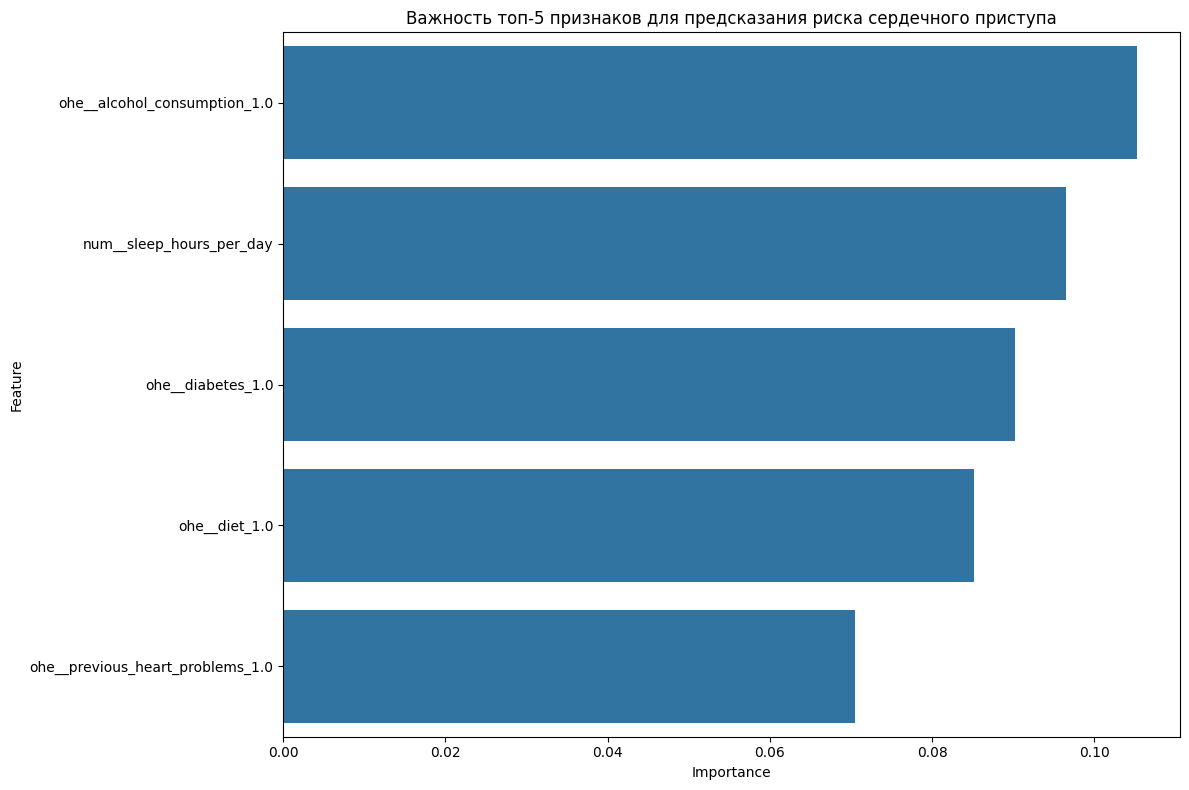

In [116]:
#Проверьте, поддерживает ли модель feature_importances_:
##Не все модели имеют feature_importances_:

###Есть у: DecisionTree, RandomForest, XGBoost и др.
###Нет у: SVM, KNN, LogisticRegressio


if hasattr(trained_model, 'feature_importances_'):
   
    importances = pd.DataFrame({
        'Feature': feature_names,
        'Importance': trained_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("Важность признаков:")
    print(importances)

    # Визуализация

    
    plt.figure(figsize=(12, 8))
    sns.barplot(data=importances.head(5), x='Importance', y='Feature')
    plt.title('Важность топ-5 признаков для предсказания риска сердечного приступа')
    plt.tight_layout()
    plt.show()
else:
    print("Выбранная модель не поддерживает атрибут feature_importances_")

C:\Users\aeroflot\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['gender']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
C:\Users\aeroflot\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['gender']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 21.11it/s]


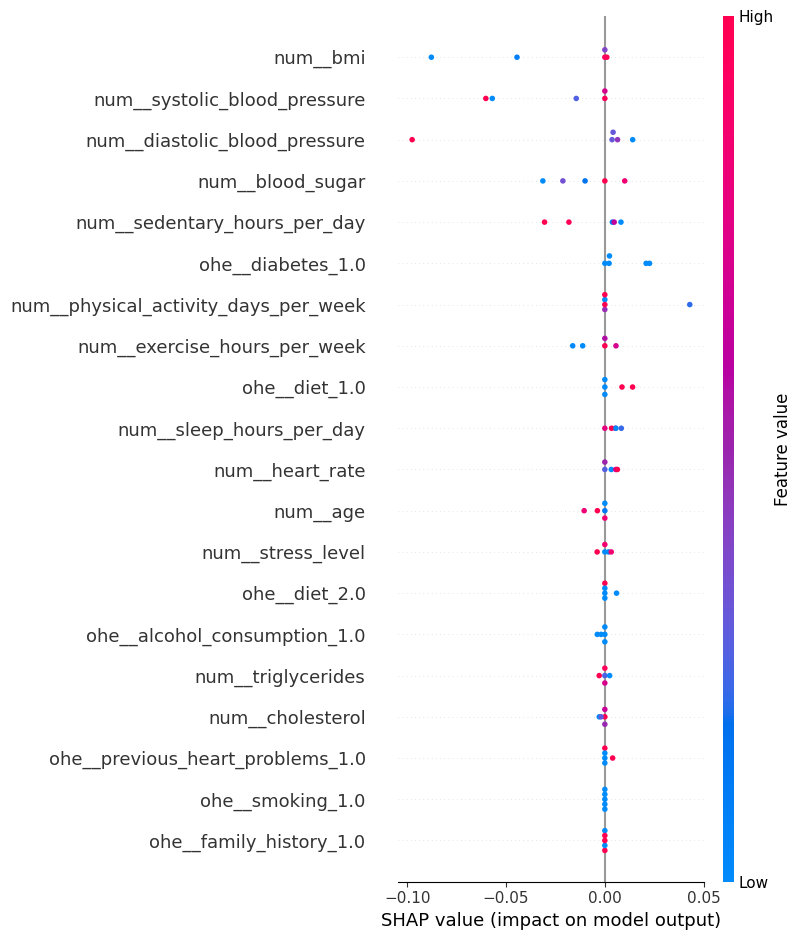

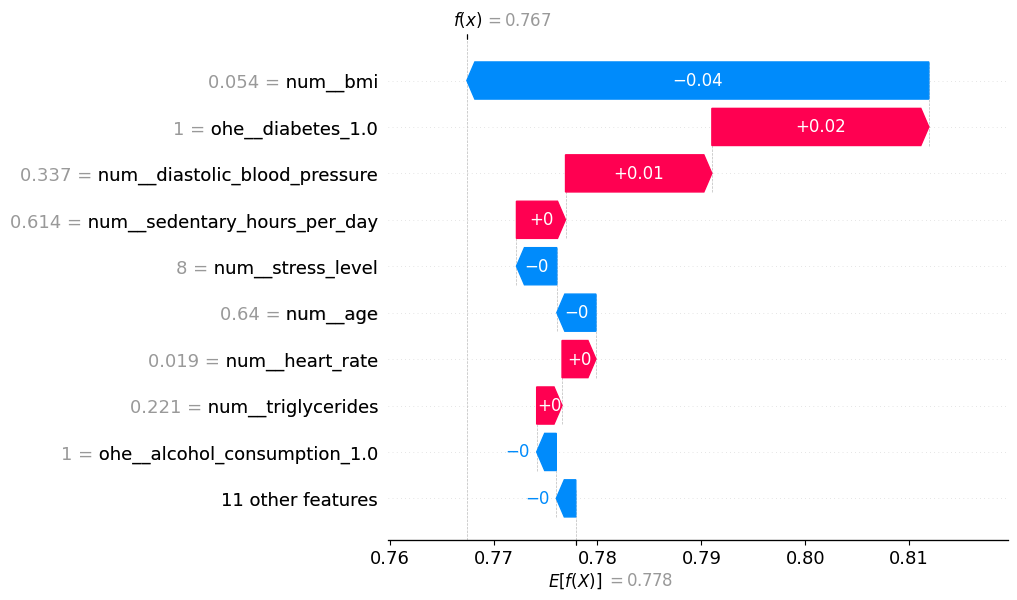

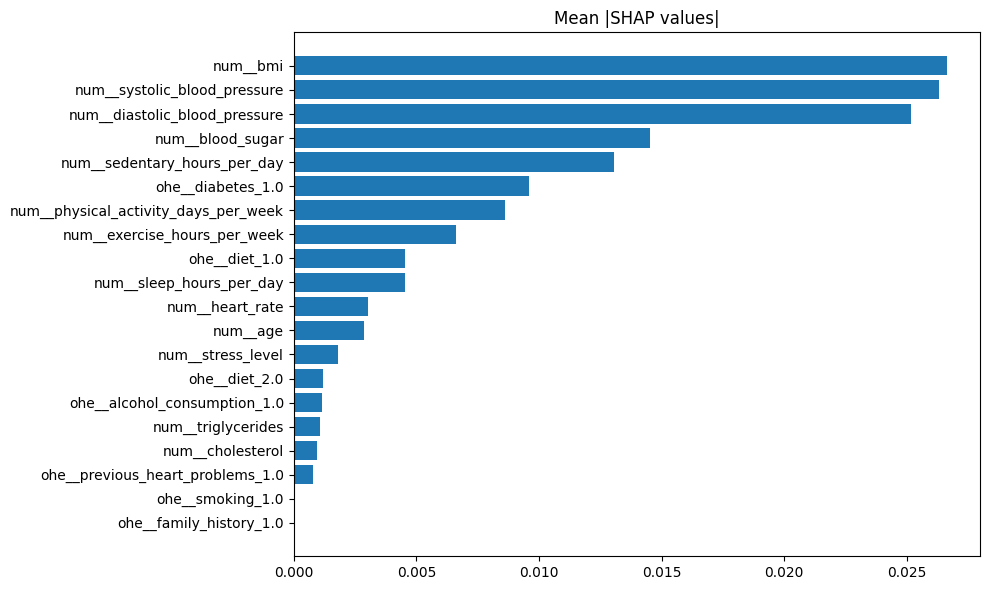

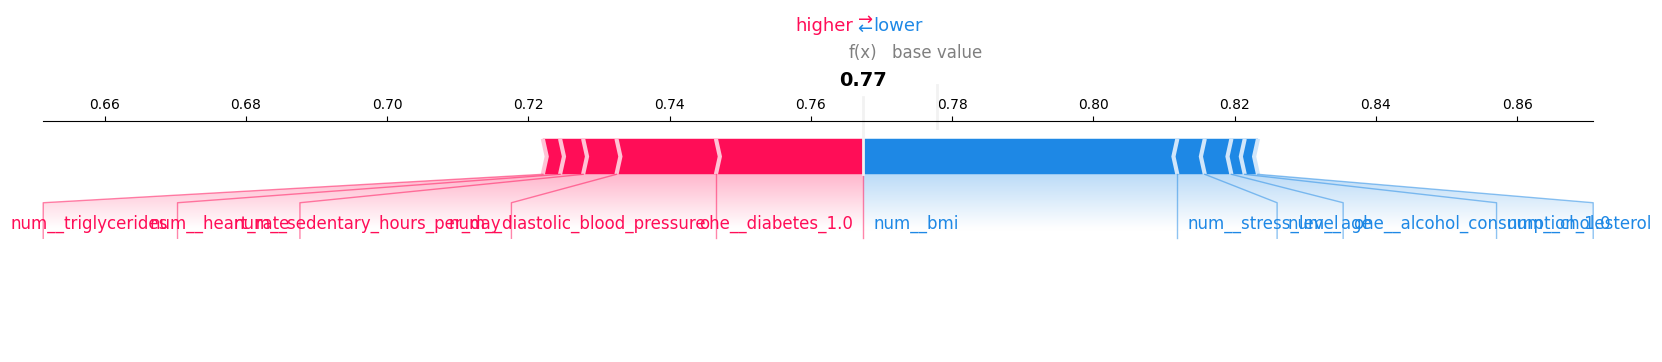

None

In [117]:
# SHAP анализ

# Получаем подготовленные данные
X_train_preprocessed = randomized_search.best_estimator_.named_steps['preprocessor'].transform(X_train)
X_test_preprocessed = randomized_search.best_estimator_.named_steps['preprocessor'].transform(X_test)


# Создаем explainer для класса 1 ("Снизилось")
explainer = shap.KernelExplainer(
    lambda x: trained_model.predict_proba(x)[:,1],  # Вероятности класса 1
    shap.sample(X_train_preprocessed, 5)
)


# Вычисляем SHAP значения
shap_values = explainer.shap_values(X_test_preprocessed[:5])

# Создаем Explanation объект вручную
shap_explanation = shap.Explanation(
    values=shap_values,
    base_values=explainer.expected_value,
    data=X_test_preprocessed[:5],
    feature_names=feature_names
)

#График shap.plots.beeswarm
shap.summary_plot(shap_values, X_test_preprocessed[:5], feature_names=feature_names)


#График shap.plots.waterfall
shap.plots.waterfall(shap_explanation[0])

#График shap.plots.bar
mean_shap = np.abs(shap_values).mean(0)
sorted_idx = np.argsort(mean_shap)[-20:]  # Топ-20 признаков

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), mean_shap[sorted_idx], color='#1f77b4')
plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
plt.title("Mean |SHAP values|")
plt.tight_layout()
plt.show()

#Force plot
shap.initjs()
display(shap.force_plot(
    explainer.expected_value,
    shap_values[0,:], 
    feature_names=feature_names,
    matplotlib=True  # Используем matplotlib вместо JS для ноутбуков
))

**Выводы**
- самый значимый признак для модели: bmi
- самый НЕ значимый признак для модели: family_history

In [100]:
# УПРОЩЕННЫЙ И СТАБИЛЬНЫЙ ВАРИАНТ Optuna - БЕЗ ПЕРЕОБУЧЕНИЯ (ИСПРАВЛЕННЫЙ)

# Уберите все дропы и используйте ВСЕ признаки
heart_test_model_o = heart_test.drop(['id', 'unnamed_0'], axis=1)
heart_train_model_o = heart_train.drop(['id', 'unnamed_0'], axis=1)

print(f"Дубликаты в test: {heart_test_model_o.duplicated().sum()}")
print(f"Дубликаты в train: {heart_train_model_o.duplicated().sum()}")

# Удаляем дубликаты если есть
heart_train_model_o = heart_train_model_o.drop_duplicates()
heart_test_model_o = heart_test_model_o.drop_duplicates()

RANDOM_STATE = 42
TEST_SIZE = 0.2

# Загружаем данные
X_train, X_test, y_train, y_test = train_test_split(
    heart_train_model_o.drop(['heart_attack_risk_binary'], axis=1),
    heart_train_model_o['heart_attack_risk_binary'],
    test_size=TEST_SIZE, 
    random_state=RANDOM_STATE,
    stratify=heart_train_model_o['heart_attack_risk_binary']
)

print(f"Размеры данных: {X_train.shape}, {X_test.shape}")
print("Распределение классов в y_train:")
print(y_train.value_counts(normalize=True))

# ПРЕОБРАЗОВАНИЕ ПРИЗНАКОВ
# Gender
X_train['gender'] = X_train['gender'].map({'Female': 0, 'Male': 1})
X_test['gender'] = X_test['gender'].map({'Female': 0, 'Male': 1})

# Списки признаков - ИСПОЛЬЗУЕМ ВСЕ
categorical_columns = [
    'diabetes', 'family_history', 'smoking', 'obesity',
    'alcohol_consumption', 'diet', 'previous_heart_problems',
    'medication_use', 'gender' 
]

numerical_columns = [
    'age', 'cholesterol', 'heart_rate', 'exercise_hours_per_week',
    'stress_level', 'sedentary_hours_per_day', 'income', 'bmi', 
    'triglycerides', 'physical_activity_days_per_week', 'sleep_hours_per_day',
    'blood_sugar', 'ck_mb', 'troponin', 'systolic_blood_pressure', 
    'diastolic_blood_pressure'
]

# БАЗОВЫЙ ПАЙПЛАЙН
base_preprocessor = ColumnTransformer([
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
    ]), categorical_columns),
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), numerical_columns)
])


Дубликаты в test: 0
Дубликаты в train: 0
Размеры данных: (6753, 25), (1689, 25)
Распределение классов в y_train:
heart_attack_risk_binary
0.0    0.643122
1.0    0.356878
Name: proportion, dtype: float64


In [101]:

# УЛУЧШЕННАЯ ФУНКЦИЯ ДЛЯ OPTUNA С БОЛЕЕ РЕАЛИСТИЧНЫМИ ПАРАМЕТРАМИ
def enhanced_objective(trial):
    try:
        model_name = trial.suggest_categorical('model', ['logistic', 'random_forest', 'xgb'])
        
        # РЕАЛИСТИЧНЫЕ ПАРАМЕТРЫ SMOTE
        smote_strategy = trial.suggest_float('smote_strategy', 0.6, 0.9)
        smote_k_neighbors = trial.suggest_int('smote_k_neighbors', 3, 7)
        
        if model_name == 'logistic':
            C = trial.suggest_float('C', 0.01, 1.0, log=True)
            penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
            solver = 'liblinear' if penalty == 'l1' else 'lbfgs'
            
            model = LogisticRegression(
                C=C, penalty=penalty, solver=solver,
                random_state=RANDOM_STATE, 
                max_iter=2000, 
                class_weight='balanced'
            )
            
        elif model_name == 'random_forest':
            n_estimators = trial.suggest_int('n_estimators', 50, 200)
            max_depth = trial.suggest_int('max_depth', 3, 10)
            min_samples_split = trial.suggest_int('min_samples_split', 5, 20)
            min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10)
            
            model = RandomForestClassifier(
                n_estimators=n_estimators, 
                max_depth=max_depth,
                min_samples_split=min_samples_split, 
                min_samples_leaf=min_samples_leaf,
                random_state=RANDOM_STATE, 
                class_weight='balanced'
            )
            
        else:  # xgb
            n_estimators = trial.suggest_int('xgb_n_estimators', 50, 200)
            max_depth = trial.suggest_int('xgb_max_depth', 2, 6)
            learning_rate = trial.suggest_float('xgb_learning_rate', 0.01, 0.1, log=True)
            scale_pos_weight = trial.suggest_float('xgb_scale_pos_weight', 1, 3)
            
            # РЕГУЛЯРИЗАЦИЯ
            reg_alpha = trial.suggest_float('xgb_reg_alpha', 0.1, 1.0)
            reg_lambda = trial.suggest_float('xgb_reg_lambda', 0.1, 1.0)
            subsample = trial.suggest_float('xgb_subsample', 0.7, 0.9)
            colsample_bytree = trial.suggest_float('xgb_colsample_bytree', 0.7, 0.9)
            
            model = XGBClassifier(
                n_estimators=n_estimators, 
                max_depth=max_depth,
                learning_rate=learning_rate, 
                scale_pos_weight=scale_pos_weight,
                reg_alpha=reg_alpha, 
                reg_lambda=reg_lambda,
                subsample=subsample, 
                colsample_bytree=colsample_bytree,
                random_state=RANDOM_STATE, 
                eval_metric='logloss'
            )
        
        scaler_name = trial.suggest_categorical('scaler', ['standard', 'robust'])
        scaler = StandardScaler() if scaler_name == 'standard' else RobustScaler()
        
        preprocessor = ColumnTransformer([
            ('cat', Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
            ]), categorical_columns),
            ('num', Pipeline([
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', scaler)
            ]), numerical_columns)
        ])
        
        pipe = ImbPipeline([
            ('preprocessor', preprocessor),
            ('smote', SMOTE(random_state=RANDOM_STATE, 
                          sampling_strategy=smote_strategy,
                          k_neighbors=smote_k_neighbors)),
            ('model', model)
        ])
        
        # БАЛАНСИРОВАННАЯ МЕТРИКА
        def balanced_f2_scorer(y_true, y_pred):
            recall = recall_score(y_true, y_pred)
            precision = precision_score(y_true, y_pred)
            
            # Штраф за recall = 1.0
            if recall == 1.0:
                return 0.0
                
            # F2-score
            if precision + recall > 0:
                return (1 + 2**2) * (precision * recall) / (4 * precision + recall)
            return 0.0
        
        scorer = make_scorer(balanced_f2_scorer)
        score = cross_val_score(
            pipe, X_train, y_train,
            scoring=scorer,
            cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE),
            n_jobs=1
        ).mean()
        
        return score
        
    except Exception as e:
        return 0.0

# ФУНКЦИЯ ДЛЯ НАСТРОЙКИ ПОРОГА
def optimize_threshold_balanced(model, X_test, y_test):
    """Находит оптимальный порог с фокусом на баланс recall/precision"""
    y_proba = model.predict_proba(X_test)[:, 1]
    
    best_threshold = 0.5
    best_score = 0
    
    for threshold in [0.3, 0.4, 0.5, 0.6, 0.7]:
        y_pred = (y_proba >= threshold).astype(int)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        
        # Штраф за экстремальные значения
        if recall == 1.0 or recall < 0.5:
            score = 0
        elif precision < 0.3:
            score = recall * 0.5
        else:
            # F2-score
            score = fbeta_score(y_test, y_pred, beta=2)
            
        if score > best_score:
            best_score = score
            best_threshold = threshold
    
    return best_threshold

# ЗАПУСК OPTUNA
study = optuna.create_study(direction='maximize', sampler=TPESampler(seed=RANDOM_STATE))

print("Запуск оптимизации Optuna...")
study.optimize(enhanced_objective, n_trials=30, show_progress_bar=True) 

# ПРОВЕРКА РЕЗУЛЬТАТОВ
if study.best_value > 0:
    print(f"\n✅ УСПЕХ! Лучшая метрика: {study.best_value:.4f}")
    print("Лучшие параметры:")
    for key, value in study.best_params.items():
        print(f"  {key}: {value}")
else:
    print("\n❌ ВСЕ Trials провалились. Запускаем ОЧЕНЬ ПРОСТУЮ модель...")
    # СУПЕР ПРОСТАЯ МОДЕЛЬ ЕСЛИ OPTUNA НЕ СРАБОТАЛА
    base_pipe = ImbPipeline([
        ('preprocessor', base_preprocessor),
        ('smote', SMOTE(random_state=RANDOM_STATE, sampling_strategy=0.6, k_neighbors=10)),
        ('model', LogisticRegression(C=0.001, random_state=RANDOM_STATE, class_weight='balanced', max_iter=1000))
    ])
    base_pipe.fit(X_train, y_train)
    
    y_pred = base_pipe.predict(X_test)
    print("Метрики базовой модели:")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    
    # Сохраняем базовую модель как лучшую
    final_pipe = base_pipe
    study.best_value = recall_score(y_test, y_pred)
    best_params = {'model': 'logistic', 'smote_strategy': 0.6, 'smote_k_neighbors': 10}

# ФИНАЛЬНАЯ МОДЕЛЬ (если Optuna сработала)
if study.best_value > 0:
    best_params = study.best_params
    
    if best_params['model'] == 'logistic':
        final_model = LogisticRegression(
            C=best_params['C'],
            random_state=RANDOM_STATE,
            max_iter=2000,
            class_weight='balanced'
        )
    elif best_params['model'] == 'random_forest':
        final_model = RandomForestClassifier(
            n_estimators=best_params['n_estimators'],
            max_depth=best_params['max_depth'],
            min_samples_split=best_params.get('min_samples_split', 50),
            min_samples_leaf=best_params.get('min_samples_leaf', 20),
            max_features='sqrt',
            random_state=RANDOM_STATE,
            class_weight='balanced'
        )
    else:  # xgb
        final_model = XGBClassifier(
            n_estimators=best_params['xgb_n_estimators'],
            max_depth=best_params['xgb_max_depth'],
            learning_rate=best_params['xgb_learning_rate'],
            scale_pos_weight=best_params['xgb_scale_pos_weight'],
            reg_alpha=best_params.get('xgb_reg_alpha', 1.0),
            reg_lambda=best_params.get('xgb_reg_lambda', 1.0),
            subsample=best_params.get('xgb_subsample', 0.6),
            colsample_bytree=best_params.get('xgb_colsample_bytree', 0.6),
            random_state=RANDOM_STATE,
            eval_metric='logloss'
        )
    
    # Создаем финальный препроцессор с лучшим скейлером
    scaler_name = best_params.get('scaler', 'standard')
    final_scaler = StandardScaler() if scaler_name == 'standard' else RobustScaler()
    
    final_preprocessor = ColumnTransformer([
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
        ]), categorical_columns),
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', final_scaler)
        ]), numerical_columns)
    ])
    
    final_pipe = ImbPipeline([
        ('preprocessor', final_preprocessor),
        ('smote', SMOTE(
            random_state=RANDOM_STATE,
            sampling_strategy=best_params['smote_strategy'],
            k_neighbors=best_params['smote_k_neighbors']
        )),
        ('model', final_model)
    ])

# ОБУЧЕНИЕ И ОЦЕНКА ФИНАЛЬНОЙ МОДЕЛИ
print("\nОбучение финальной модели...")
final_pipe.fit(X_train, y_train)

# НАСТРОЙКА ПОРОГА КЛАССИФИКАЦИИ
print("Настройка оптимального порога...")
optimal_threshold = optimize_threshold_balanced(final_pipe, X_test, y_test)
print(f"Оптимальный порог: {optimal_threshold}")

# ПРЕДСКАЗАНИЯ С ОПТИМАЛЬНЫМ ПОРОГОМ
y_proba_test = final_pipe.predict_proba(X_test)[:, 1]
y_proba_train = final_pipe.predict_proba(X_train)[:, 1]

y_test_pred = (y_proba_test >= optimal_threshold).astype(int)
y_train_pred = (y_proba_train >= optimal_threshold).astype(int)

[I 2025-10-08 19:21:48,751] A new study created in memory with name: no-name-b7235462-c7f6-48a1-8f0d-640b906e71e2


Запуск оптимизации Optuna...


Best trial: 1. Best value: 0.513729:   7%|███                                           | 2/30 [00:00<00:12,  2.33it/s]

[I 2025-10-08 19:21:49,581] Trial 0 finished with value: 0.34260577302836065 and parameters: {'model': 'random_forest', 'smote_strategy': 0.779597545259111, 'smote_k_neighbors': 3, 'n_estimators': 73, 'max_depth': 3, 'min_samples_split': 18, 'min_samples_leaf': 7, 'scaler': 'standard'}. Best is trial 0 with value: 0.34260577302836065.
[I 2025-10-08 19:21:49,715] Trial 1 finished with value: 0.5137287866236863 and parameters: {'model': 'logistic', 'smote_strategy': 0.6545474901621302, 'smote_k_neighbors': 3, 'C': 0.04059611610484305, 'penalty': 'l1', 'scaler': 'robust'}. Best is trial 1 with value: 0.5137287866236863.


Best trial: 1. Best value: 0.513729:  10%|████▌                                         | 3/30 [00:01<00:10,  2.58it/s]

[I 2025-10-08 19:21:50,063] Trial 2 finished with value: 0.02156963935463728 and parameters: {'model': 'xgb', 'smote_strategy': 0.7368209952651108, 'smote_k_neighbors': 6, 'xgb_n_estimators': 80, 'xgb_max_depth': 4, 'xgb_learning_rate': 0.03912141628549695, 'xgb_scale_pos_weight': 1.0929008254399954, 'xgb_reg_alpha': 0.6467903667112945, 'xgb_reg_lambda': 0.2534717113185624, 'xgb_subsample': 0.7130103185970559, 'xgb_colsample_bytree': 0.8897771074506666, 'scaler': 'standard'}. Best is trial 1 with value: 0.5137287866236863.


Best trial: 1. Best value: 0.513729:  13%|██████▏                                       | 4/30 [00:01<00:09,  2.79it/s]

[I 2025-10-08 19:21:50,377] Trial 3 finished with value: 0.48653907442245514 and parameters: {'model': 'xgb', 'smote_strategy': 0.7320457481218804, 'smote_k_neighbors': 3, 'xgb_n_estimators': 124, 'xgb_max_depth': 2, 'xgb_learning_rate': 0.08115595675970502, 'xgb_scale_pos_weight': 1.5175599632000338, 'xgb_reg_alpha': 0.6962700559185838, 'xgb_reg_lambda': 0.3805399684804699, 'xgb_subsample': 0.8040136042355621, 'xgb_colsample_bytree': 0.8093420558686559, 'scaler': 'robust'}. Best is trial 1 with value: 0.5137287866236863.


Best trial: 1. Best value: 0.513729:  20%|█████████▏                                    | 6/30 [00:02<00:09,  2.42it/s]

[I 2025-10-08 19:21:51,256] Trial 4 finished with value: 0.28581571854463445 and parameters: {'model': 'random_forest', 'smote_strategy': 0.7793699936433256, 'smote_k_neighbors': 7, 'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 4, 'scaler': 'standard'}. Best is trial 1 with value: 0.5137287866236863.
[I 2025-10-08 19:21:51,402] Trial 5 finished with value: 0.4515546391566024 and parameters: {'model': 'logistic', 'smote_strategy': 0.7628088249474745, 'smote_k_neighbors': 3, 'C': 0.40215545266902863, 'penalty': 'l2', 'scaler': 'standard'}. Best is trial 1 with value: 0.5137287866236863.


Best trial: 1. Best value: 0.513729:  23%|██████████▋                                   | 7/30 [00:03<00:13,  1.70it/s]

[I 2025-10-08 19:21:52,352] Trial 6 finished with value: 0.2244666833736594 and parameters: {'model': 'random_forest', 'smote_strategy': 0.8187021504122962, 'smote_k_neighbors': 6, 'n_estimators': 61, 'max_depth': 5, 'min_samples_split': 6, 'min_samples_leaf': 9, 'scaler': 'standard'}. Best is trial 1 with value: 0.5137287866236863.


Best trial: 7. Best value: 0.729181:  27%|████████████▎                                 | 8/30 [00:04<00:12,  1.75it/s]

[I 2025-10-08 19:21:52,897] Trial 7 finished with value: 0.7291810490470003 and parameters: {'model': 'xgb', 'smote_strategy': 0.8188818535014193, 'smote_k_neighbors': 6, 'xgb_n_estimators': 183, 'xgb_max_depth': 4, 'xgb_learning_rate': 0.013170256885255107, 'xgb_scale_pos_weight': 2.42648957444599, 'xgb_reg_alpha': 0.7847065437552077, 'xgb_reg_lambda': 0.6051494778125466, 'xgb_subsample': 0.8541934359909122, 'xgb_colsample_bytree': 0.7987591192728781, 'scaler': 'standard'}. Best is trial 7 with value: 0.7291810490470003.


Best trial: 7. Best value: 0.729181:  30%|█████████████▊                                | 9/30 [00:06<00:26,  1.26s/it]

[I 2025-10-08 19:21:55,667] Trial 8 finished with value: 0.1902250743206617 and parameters: {'model': 'random_forest', 'smote_strategy': 0.7909231233791341, 'smote_k_neighbors': 4, 'n_estimators': 126, 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 5, 'scaler': 'standard'}. Best is trial 7 with value: 0.7291810490470003.


Best trial: 7. Best value: 0.729181:  33%|███████████████                              | 10/30 [00:10<00:36,  1.83s/it]

[I 2025-10-08 19:21:58,790] Trial 9 finished with value: 0.11193460183521463 and parameters: {'model': 'random_forest', 'smote_strategy': 0.878909295702772, 'smote_k_neighbors': 7, 'n_estimators': 145, 'max_depth': 9, 'min_samples_split': 17, 'min_samples_leaf': 3, 'scaler': 'standard'}. Best is trial 7 with value: 0.7291810490470003.


Best trial: 7. Best value: 0.729181:  37%|████████████████▌                            | 11/30 [00:10<00:29,  1.54s/it]

[I 2025-10-08 19:21:59,675] Trial 10 finished with value: 0.7260827443945687 and parameters: {'model': 'xgb', 'smote_strategy': 0.8723966768184162, 'smote_k_neighbors': 5, 'xgb_n_estimators': 194, 'xgb_max_depth': 6, 'xgb_learning_rate': 0.01093264383813169, 'xgb_scale_pos_weight': 2.7304219669082164, 'xgb_reg_alpha': 0.9724826252122103, 'xgb_reg_lambda': 0.9095335654407443, 'xgb_subsample': 0.8984725330920674, 'xgb_colsample_bytree': 0.7056956582279943, 'scaler': 'robust'}. Best is trial 7 with value: 0.7291810490470003.


Best trial: 7. Best value: 0.729181:  40%|██████████████████                           | 12/30 [00:11<00:24,  1.35s/it]

[I 2025-10-08 19:22:00,571] Trial 11 finished with value: 0.7275900953442985 and parameters: {'model': 'xgb', 'smote_strategy': 0.896198163695615, 'smote_k_neighbors': 5, 'xgb_n_estimators': 195, 'xgb_max_depth': 6, 'xgb_learning_rate': 0.010107798879886892, 'xgb_scale_pos_weight': 2.772605589619047, 'xgb_reg_alpha': 0.9734143351822085, 'xgb_reg_lambda': 0.9393153610499076, 'xgb_subsample': 0.8996803792187473, 'xgb_colsample_bytree': 0.7068311268451675, 'scaler': 'robust'}. Best is trial 7 with value: 0.7291810490470003.


Best trial: 12. Best value: 0.729933:  43%|███████████████████                         | 13/30 [00:12<00:19,  1.17s/it]

[I 2025-10-08 19:22:01,321] Trial 12 finished with value: 0.7299326212361196 and parameters: {'model': 'xgb', 'smote_strategy': 0.8983854765809945, 'smote_k_neighbors': 5, 'xgb_n_estimators': 200, 'xgb_max_depth': 5, 'xgb_learning_rate': 0.010070020006582985, 'xgb_scale_pos_weight': 2.6857851962086423, 'xgb_reg_alpha': 0.9862246727109388, 'xgb_reg_lambda': 0.8406257964643632, 'xgb_subsample': 0.8990973636447508, 'xgb_colsample_bytree': 0.7213475414575323, 'scaler': 'robust'}. Best is trial 12 with value: 0.7299326212361196.


Best trial: 12. Best value: 0.729933:  47%|████████████████████▌                       | 14/30 [00:13<00:15,  1.02it/s]

[I 2025-10-08 19:22:01,869] Trial 13 finished with value: 0.7077224678728352 and parameters: {'model': 'xgb', 'smote_strategy': 0.830026955129277, 'smote_k_neighbors': 6, 'xgb_n_estimators': 200, 'xgb_max_depth': 4, 'xgb_learning_rate': 0.018081659456430418, 'xgb_scale_pos_weight': 2.3032952285463884, 'xgb_reg_alpha': 0.24900065324683995, 'xgb_reg_lambda': 0.683429793481289, 'xgb_subsample': 0.8432581278465607, 'xgb_colsample_bytree': 0.7626691496449942, 'scaler': 'robust'}. Best is trial 12 with value: 0.7299326212361196.


Best trial: 12. Best value: 0.729933:  50%|██████████████████████                      | 15/30 [00:13<00:12,  1.21it/s]

[I 2025-10-08 19:22:02,351] Trial 14 finished with value: 0.7145952717530148 and parameters: {'model': 'xgb', 'smote_strategy': 0.8443770386040429, 'smote_k_neighbors': 4, 'xgb_n_estimators': 156, 'xgb_max_depth': 4, 'xgb_learning_rate': 0.020085583309182604, 'xgb_scale_pos_weight': 2.2632741169941193, 'xgb_reg_alpha': 0.8026129398876989, 'xgb_reg_lambda': 0.6632556448873488, 'xgb_subsample': 0.8439869786879088, 'xgb_colsample_bytree': 0.7963312740325416, 'scaler': 'robust'}. Best is trial 12 with value: 0.7299326212361196.


Best trial: 12. Best value: 0.729933:  57%|████████████████████████▉                   | 17/30 [00:14<00:07,  1.75it/s]

[I 2025-10-08 19:22:02,890] Trial 15 finished with value: 0.7212061712394915 and parameters: {'model': 'xgb', 'smote_strategy': 0.6844242778736879, 'smote_k_neighbors': 5, 'xgb_n_estimators': 151, 'xgb_max_depth': 5, 'xgb_learning_rate': 0.01653593948057573, 'xgb_scale_pos_weight': 2.898609894672164, 'xgb_reg_alpha': 0.4588733967521669, 'xgb_reg_lambda': 0.5109028323707946, 'xgb_subsample': 0.8597240848123554, 'xgb_colsample_bytree': 0.8613073318263127, 'scaler': 'robust'}. Best is trial 12 with value: 0.7299326212361196.
[I 2025-10-08 19:22:03,074] Trial 16 finished with value: 0.45812009795979275 and parameters: {'model': 'logistic', 'smote_strategy': 0.8387603285680719, 'smote_k_neighbors': 6, 'C': 0.010032774997722246, 'penalty': 'l2', 'scaler': 'standard'}. Best is trial 12 with value: 0.7299326212361196.


Best trial: 12. Best value: 0.729933:  60%|██████████████████████████▍                 | 18/30 [00:14<00:06,  1.90it/s]

[I 2025-10-08 19:22:03,493] Trial 17 finished with value: 0.7178181730916887 and parameters: {'model': 'xgb', 'smote_strategy': 0.8633557648168322, 'smote_k_neighbors': 4, 'xgb_n_estimators': 160, 'xgb_max_depth': 3, 'xgb_learning_rate': 0.030276105136343018, 'xgb_scale_pos_weight': 2.3522199508941295, 'xgb_reg_alpha': 0.843112970197401, 'xgb_reg_lambda': 0.7846216596705392, 'xgb_subsample': 0.8724485750964405, 'xgb_colsample_bytree': 0.7523828537990808, 'scaler': 'robust'}. Best is trial 12 with value: 0.7299326212361196.


Best trial: 12. Best value: 0.729933:  63%|███████████████████████████▊                | 19/30 [00:15<00:06,  1.74it/s]

[I 2025-10-08 19:22:04,177] Trial 18 finished with value: 0.6738058006606497 and parameters: {'model': 'xgb', 'smote_strategy': 0.8970864979873914, 'smote_k_neighbors': 7, 'xgb_n_estimators': 173, 'xgb_max_depth': 5, 'xgb_learning_rate': 0.013225010051035341, 'xgb_scale_pos_weight': 1.9059715199319527, 'xgb_reg_alpha': 0.4262445096202382, 'xgb_reg_lambda': 0.5251625218943385, 'xgb_subsample': 0.7940262923538725, 'xgb_colsample_bytree': 0.8223490207387321, 'scaler': 'standard'}. Best is trial 12 with value: 0.7299326212361196.


Best trial: 12. Best value: 0.729933:  67%|█████████████████████████████▎              | 20/30 [00:15<00:05,  1.82it/s]

[I 2025-10-08 19:22:04,669] Trial 19 finished with value: 0.6714913141815515 and parameters: {'model': 'xgb', 'smote_strategy': 0.6126809077978995, 'smote_k_neighbors': 6, 'xgb_n_estimators': 121, 'xgb_max_depth': 5, 'xgb_learning_rate': 0.029499512177813794, 'xgb_scale_pos_weight': 2.4695560586438434, 'xgb_reg_alpha': 0.8325806810540632, 'xgb_reg_lambda': 0.782453270192471, 'xgb_subsample': 0.8084082839952936, 'xgb_colsample_bytree': 0.7478781902734639, 'scaler': 'robust'}. Best is trial 12 with value: 0.7299326212361196.


Best trial: 12. Best value: 0.729933:  70%|██████████████████████████████▊             | 21/30 [00:16<00:04,  2.16it/s]

[I 2025-10-08 19:22:04,929] Trial 20 finished with value: 0.46504855206328316 and parameters: {'model': 'logistic', 'smote_strategy': 0.8069783164920468, 'smote_k_neighbors': 5, 'C': 0.8312297694364624, 'penalty': 'l1', 'scaler': 'robust'}. Best is trial 12 with value: 0.7299326212361196.


Best trial: 12. Best value: 0.729933:  73%|████████████████████████████████▎           | 22/30 [00:17<00:04,  1.68it/s]

[I 2025-10-08 19:22:05,828] Trial 21 finished with value: 0.728850783143313 and parameters: {'model': 'xgb', 'smote_strategy': 0.8895047404479511, 'smote_k_neighbors': 5, 'xgb_n_estimators': 199, 'xgb_max_depth': 6, 'xgb_learning_rate': 0.010545052203716791, 'xgb_scale_pos_weight': 2.9714990927713925, 'xgb_reg_alpha': 0.9994721446789164, 'xgb_reg_lambda': 0.9709779258440856, 'xgb_subsample': 0.8991956440568171, 'xgb_colsample_bytree': 0.7078156566835361, 'scaler': 'robust'}. Best is trial 12 with value: 0.7299326212361196.


Best trial: 12. Best value: 0.729933:  77%|█████████████████████████████████▋          | 23/30 [00:17<00:04,  1.48it/s]

[I 2025-10-08 19:22:06,691] Trial 22 finished with value: 0.7235658822307284 and parameters: {'model': 'xgb', 'smote_strategy': 0.8555492639216217, 'smote_k_neighbors': 4, 'xgb_n_estimators': 180, 'xgb_max_depth': 6, 'xgb_learning_rate': 0.013286816132168078, 'xgb_scale_pos_weight': 2.928366521480598, 'xgb_reg_alpha': 0.9366533903239656, 'xgb_reg_lambda': 0.9982225092287316, 'xgb_subsample': 0.886520650791077, 'xgb_colsample_bytree': 0.7255917047487581, 'scaler': 'robust'}. Best is trial 12 with value: 0.7299326212361196.


Best trial: 12. Best value: 0.729933:  80%|███████████████████████████████████▏        | 24/30 [00:18<00:04,  1.48it/s]

[I 2025-10-08 19:22:07,376] Trial 23 finished with value: 0.7286411797585726 and parameters: {'model': 'xgb', 'smote_strategy': 0.8932013062223202, 'smote_k_neighbors': 5, 'xgb_n_estimators': 179, 'xgb_max_depth': 5, 'xgb_learning_rate': 0.010798666035046384, 'xgb_scale_pos_weight': 2.5444424699569423, 'xgb_reg_alpha': 0.7386056052473475, 'xgb_reg_lambda': 0.8341125401209161, 'xgb_subsample': 0.8637064414813794, 'xgb_colsample_bytree': 0.7833355447902091, 'scaler': 'robust'}. Best is trial 12 with value: 0.7299326212361196.


Best trial: 12. Best value: 0.729933:  83%|████████████████████████████████████▋       | 25/30 [00:18<00:02,  1.80it/s]

[I 2025-10-08 19:22:07,646] Trial 24 finished with value: 0.24494533015698486 and parameters: {'model': 'xgb', 'smote_strategy': 0.8596126307583931, 'smote_k_neighbors': 6, 'xgb_n_estimators': 58, 'xgb_max_depth': 3, 'xgb_learning_rate': 0.014294624195037712, 'xgb_scale_pos_weight': 1.9314619467668788, 'xgb_reg_alpha': 0.9928381680968341, 'xgb_reg_lambda': 0.11226083386451224, 'xgb_subsample': 0.8312945547859205, 'xgb_colsample_bytree': 0.7293531386090102, 'scaler': 'robust'}. Best is trial 12 with value: 0.7299326212361196.


Best trial: 12. Best value: 0.729933:  87%|██████████████████████████████████████▏     | 26/30 [00:19<00:02,  1.65it/s]

[I 2025-10-08 19:22:08,368] Trial 25 finished with value: 0.7242941009076426 and parameters: {'model': 'xgb', 'smote_strategy': 0.8114763430002143, 'smote_k_neighbors': 5, 'xgb_n_estimators': 199, 'xgb_max_depth': 5, 'xgb_learning_rate': 0.010193617448867527, 'xgb_scale_pos_weight': 2.647940668161039, 'xgb_reg_alpha': 0.842146401724129, 'xgb_reg_lambda': 0.6714602963467797, 'xgb_subsample': 0.8807862334656251, 'xgb_colsample_bytree': 0.8509968183750158, 'scaler': 'robust'}. Best is trial 12 with value: 0.7299326212361196.


Best trial: 12. Best value: 0.729933:  90%|███████████████████████████████████████▌    | 27/30 [00:20<00:01,  1.52it/s]

[I 2025-10-08 19:22:09,147] Trial 26 finished with value: 0.643479574636621 and parameters: {'model': 'xgb', 'smote_strategy': 0.8754914661581156, 'smote_k_neighbors': 5, 'xgb_n_estimators': 138, 'xgb_max_depth': 6, 'xgb_learning_rate': 0.022325056195029995, 'xgb_scale_pos_weight': 2.126979945106118, 'xgb_reg_alpha': 0.5744220221304526, 'xgb_reg_lambda': 0.8607199130156582, 'xgb_subsample': 0.8992864008902315, 'xgb_colsample_bytree': 0.7743439348085206, 'scaler': 'standard'}. Best is trial 12 with value: 0.7299326212361196.


Best trial: 12. Best value: 0.729933:  97%|██████████████████████████████████████████▌ | 29/30 [00:20<00:00,  2.18it/s]

[I 2025-10-08 19:22:09,578] Trial 27 finished with value: 0.7065013512356707 and parameters: {'model': 'xgb', 'smote_strategy': 0.7066161642708799, 'smote_k_neighbors': 4, 'xgb_n_estimators': 175, 'xgb_max_depth': 3, 'xgb_learning_rate': 0.05351982600955659, 'xgb_scale_pos_weight': 2.988231468584011, 'xgb_reg_alpha': 0.8915767379563819, 'xgb_reg_lambda': 0.40897979832215803, 'xgb_subsample': 0.7686071839529739, 'xgb_colsample_bytree': 0.7291024462701187, 'scaler': 'robust'}. Best is trial 12 with value: 0.7299326212361196.
[I 2025-10-08 19:22:09,737] Trial 28 finished with value: 0.46083963060360095 and parameters: {'model': 'logistic', 'smote_strategy': 0.8387843412547143, 'smote_k_neighbors': 6, 'C': 0.12473304770335755, 'penalty': 'l2', 'scaler': 'standard'}. Best is trial 12 with value: 0.7299326212361196.


Best trial: 12. Best value: 0.729933: 100%|████████████████████████████████████████████| 30/30 [00:21<00:00,  1.38it/s]


[I 2025-10-08 19:22:10,453] Trial 29 finished with value: 0.7120883707946603 and parameters: {'model': 'xgb', 'smote_strategy': 0.7894324752432982, 'smote_k_neighbors': 7, 'xgb_n_estimators': 180, 'xgb_max_depth': 5, 'xgb_learning_rate': 0.014520345778894385, 'xgb_scale_pos_weight': 2.5694130743183012, 'xgb_reg_alpha': 0.11970236333812007, 'xgb_reg_lambda': 0.7180887961068205, 'xgb_subsample': 0.858982174478952, 'xgb_colsample_bytree': 0.8386697492207243, 'scaler': 'standard'}. Best is trial 12 with value: 0.7299326212361196.

✅ УСПЕХ! Лучшая метрика: 0.7299
Лучшие параметры:
  model: xgb
  smote_strategy: 0.8983854765809945
  smote_k_neighbors: 5
  xgb_n_estimators: 200
  xgb_max_depth: 5
  xgb_learning_rate: 0.010070020006582985
  xgb_scale_pos_weight: 2.6857851962086423
  xgb_reg_alpha: 0.9862246727109388
  xgb_reg_lambda: 0.8406257964643632
  xgb_subsample: 0.8990973636447508
  xgb_colsample_bytree: 0.7213475414575323
  scaler: robust

Обучение финальной модели...
Настройка оптимал

In [102]:
# РЕЗУЛЬТАТЫ
print("\n📊 ФИНАЛЬНЫЕ РЕЗУЛЬТАТЫ (с оптимальным порогом):")
print("Тестовая выборка:")
print(f"Recall: {recall_score(y_test, y_test_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"F1: {f1_score(y_test, y_test_pred):.4f}")
print(f"F2: {fbeta_score(y_test, y_test_pred, beta=2):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

print("\n🔍 ПРОВЕРКА ПЕРЕОБУЧЕНИЯ:")
print(f"Train Recall: {recall_score(y_train, y_train_pred):.4f}")
print(f"Test Recall:  {recall_score(y_test, y_test_pred):.4f}")
print(f"Разница Recall: {recall_score(y_train, y_train_pred) - recall_score(y_test, y_test_pred):.4f}")
print(f"Train Precision: {precision_score(y_train, y_train_pred):.4f}")
print(f"Test Precision:  {precision_score(y_test, y_test_pred):.4f}")
print(f"Разница Precision: {precision_score(y_train, y_train_pred) - precision_score(y_test, y_test_pred):.4f}")

# ДОПОЛНИТЕЛЬНАЯ ДИАГНОСТИКА
print(f"\n📈 ДИАГНОСТИКА:")
print(f"Размер тренировочной выборки: {X_train.shape[0]}")
print(f"Размер тестовой выборки: {X_test.shape[0]}")
print(f"Кол-во признаков: {X_train.shape[1]}")
print(f"Распределение классов: {y_train.value_counts().to_dict()}")

# 🔍 АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ
print("\n🔍 АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ:")

try:
    # Получаем обученную модель из пайплайна
    trained_model = final_pipe.named_steps['model']
    
    # Проверяем, поддерживает ли модель атрибут feature_importances_
    if hasattr(trained_model, 'feature_importances_'):
        importances = trained_model.feature_importances_
        
        # Получаем имена признаков после препроцессинга
        feature_names = final_pipe.named_steps['preprocessor'].get_feature_names_out()
        
        # Создаем DataFrame с важностью признаков
        feat_imp = pd.DataFrame({'feature': feature_names, 'importance': importances})
        feat_imp = feat_imp.sort_values('importance', ascending=False)
        
        print("\nТоп-25 самых важных признаков:")
        print(feat_imp.head(25))
        
    else:
        print("Модель не поддерживает feature_importances_")
        
        # Для логистической регрессии можно посмотреть коэффициенты
        if hasattr(trained_model, 'coef_'):
            coefficients = trained_model.coef_[0]
            feature_names = final_pipe.named_steps['preprocessor'].get_feature_names_out()
            
            coef_df = pd.DataFrame({'feature': feature_names, 'coefficient': coefficients})
            coef_df['abs_coef'] = np.abs(coef_df['coefficient'])
            coef_df = coef_df.sort_values('abs_coef', ascending=False)
            
            print("\nТоп-15 признаков по абсолютным коэффициентам (Логистическая регрессия):")
            print(coef_df.head(15))

except Exception as e:
    print(f"Ошибка при анализе важности признаков: {e}")

print("\n✅ Скрипт завершен!")


📊 ФИНАЛЬНЫЕ РЕЗУЛЬТАТЫ (с оптимальным порогом):
Тестовая выборка:
Recall: 0.9983
Precision: 0.3588
F1: 0.5278
F2: 0.7359
Accuracy: 0.3623

🔍 ПРОВЕРКА ПЕРЕОБУЧЕНИЯ:
Train Recall: 1.0000
Test Recall:  0.9983
Разница Recall: 0.0017
Train Precision: 0.3624
Test Precision:  0.3588
Разница Precision: 0.0036

📈 ДИАГНОСТИКА:
Размер тренировочной выборки: 6753
Размер тестовой выборки: 1689
Кол-во признаков: 25
Распределение классов: {0.0: 4343, 1.0: 2410}

🔍 АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ:

Топ-50 самых важных признаков:
                                 feature  importance
0                      cat__diabetes_1.0    0.104339
3                       cat__obesity_1.0    0.087941
4           cat__alcohol_consumption_1.0    0.083471
20              num__sleep_hours_per_day    0.080516
14                     num__stress_level    0.061626
23                         num__troponin    0.060294
7       cat__previous_heart_problems_1.0    0.045454
9                        cat__gender_1.0    0.040512
22       

## Шаг 5. Подготовка предсказания на тестовой выборке

## Шаг 6. Подготовка скриптов и библиотеки для обработки данных и предсказания на тестовой выборке

## Шаг 7. Написание инструмента для тестирования

## Шаг 8. Оформление документации

## Шаг 9. Общий вывод

Esc: Переключение между режимом выполнения и редактирования

A: Добавление пустой ячейки сверху

B: Добавление пустой ячейки снизу

DD: Удаления ячейки

C: Копирование ячеек

X: Вырезание ячеек

V: Вставка ячеек

Комбинируя их, вы сможете быстро совершать множество базовых действий. 

Например, для перезапуска блокнота нажмите ESC + 00.

Чтобы прокрутить блокнот вниз, нажмите Space, или а Shift + Space — для прокрутки вверх.

Для запуска кода используйте: 

Shift+Enter — выполнение текущей ячейки и перевод фокуса на следующую.
Ctrl+Enter — выполнение текущей ячейки и сохранение фокуса на текущей ячейке.
Alt+Enter — выполнение текущей ячейки и перевод фокуса на новую ячейку созданную ниже.
Для быстрого удаления ячейки нажмите ESC + Z. 

Если вы начали писать код в одной ячейке, но понимаете, что их всё же нужно разделить, не обязательно разделять текст вручную. Просто поставьте курсор в нужное место и используйте Control + Shift + или -. 

Чтобы легко и быстро перемещаться к ячейке, которая выполняется в данный момент, нажмите Alt + I.

А если что-то пошло не по плану, можно пропустить выполнение ячейки, зажав %%script false. 

Если не хочется морочиться с маркдауном и вручную проставлять #, используйте шорткаты: 1, 2, 3, 4, 5, 6.

Похожие команды есть и для конвертации типов ячеек

Y — code,
M — markdown,
R — raw.
Чтобы открыть полный список горячих клавиш, нажмите Help → Keyboard Shortcuts в верхнем меню.